In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scipy.special as sc
from scipy.integrate import quad
import math
import arviz as az
import warnings

# Ignora i warning di tipo UserWarning
warnings.filterwarnings("ignore", category=UserWarning)

In [2]:
# set seed to make the results fully reproducible
seed: int = sum(map(ord, "cont_rv_distr"))
rng: np.random.Generator = np.random.default_rng(seed=seed)

az.style.use("arviz-darkgrid")
plt.rcParams["figure.dpi"] = 100
plt.rcParams["figure.facecolor"] = "white"

%config InlineBackend.figure_format = "retina"

In [3]:
y = rng.uniform(low=0, high=360, size=20)
print(y)

[131.07240891 311.8663676  143.37319434   4.24029136  29.11367217
 221.11691888 144.11311124  59.56390247  90.70501061  62.44322116
 109.88771579 179.97840506 224.07972765  24.53059252 157.92179606
  89.40259112 244.50905476 268.8670261  243.07493583 180.18799873]


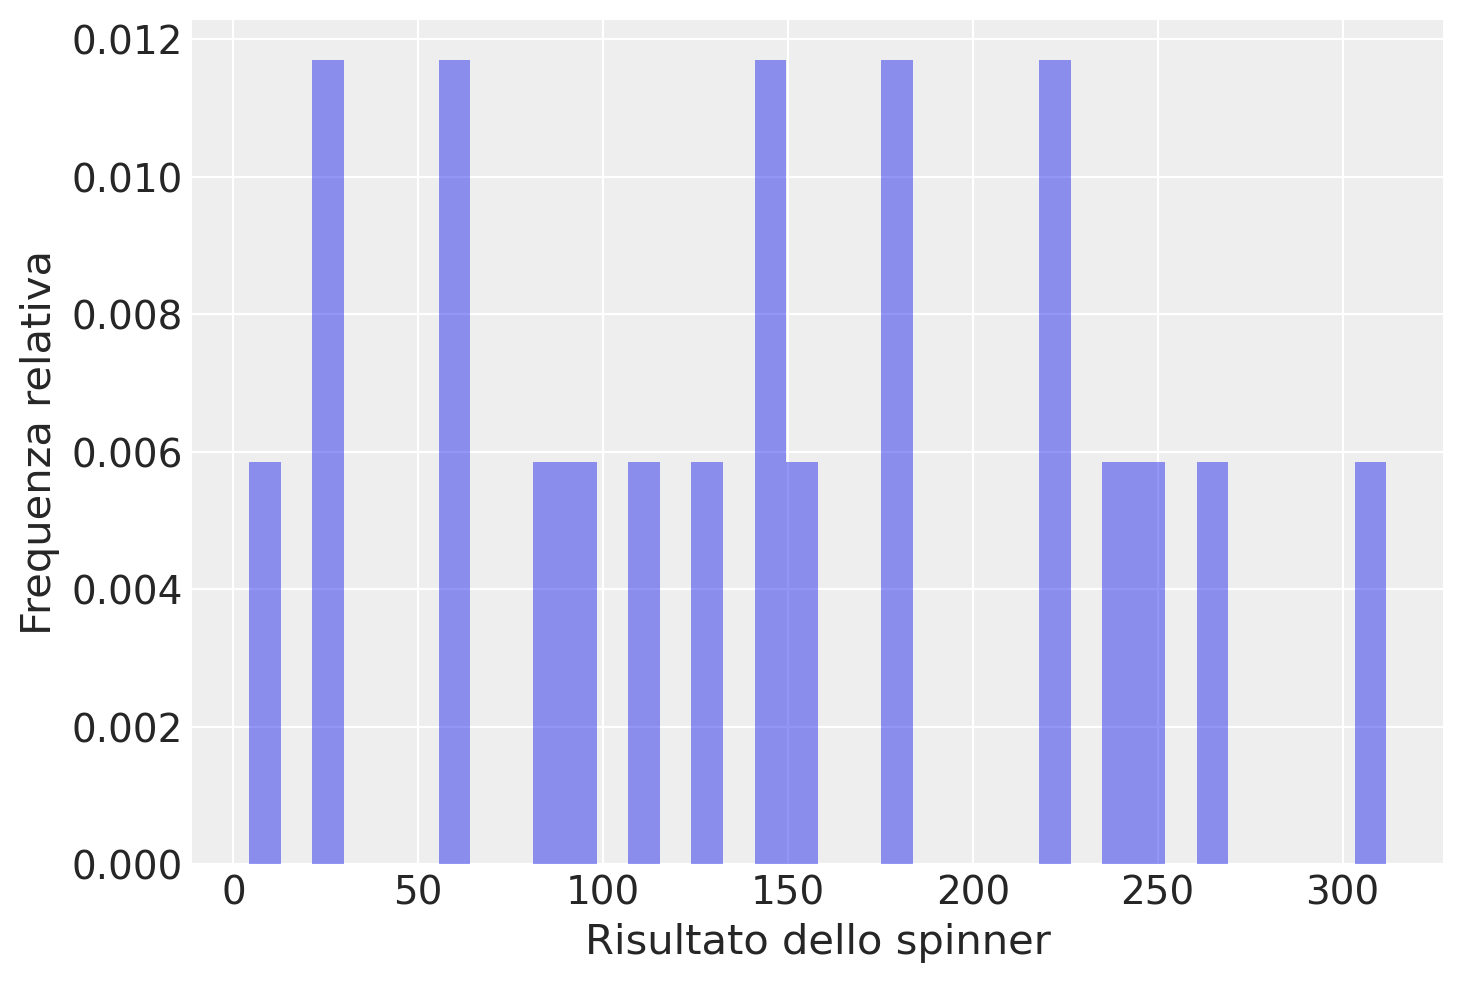

In [4]:
plt.figure()
count, bins, ignored = plt.hist(y, bins=36, density=True, alpha=0.5)
plt.xlabel("Risultato dello spinner")
plt.ylabel("Frequenza relativa");

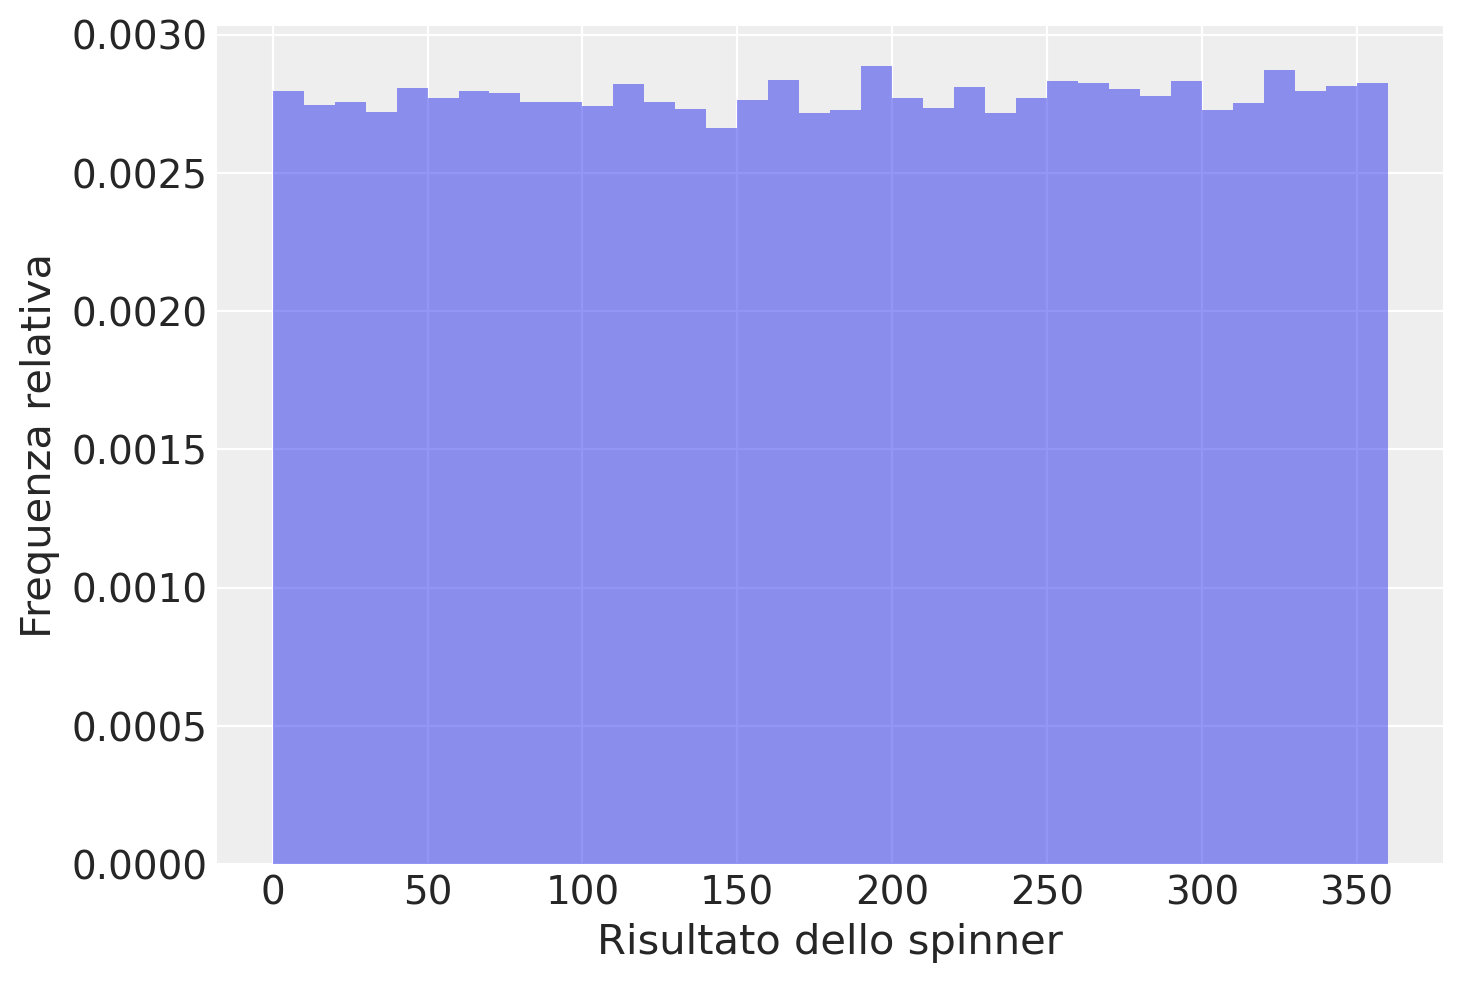

In [5]:
plt.figure()
count, bins, ignored = plt.hist(rng.uniform(0, 360, 100000), bins=36, density=True, alpha=0.5)
plt.xlabel("Risultato dello spinner")
_ = plt.ylabel("Frequenza relativa")

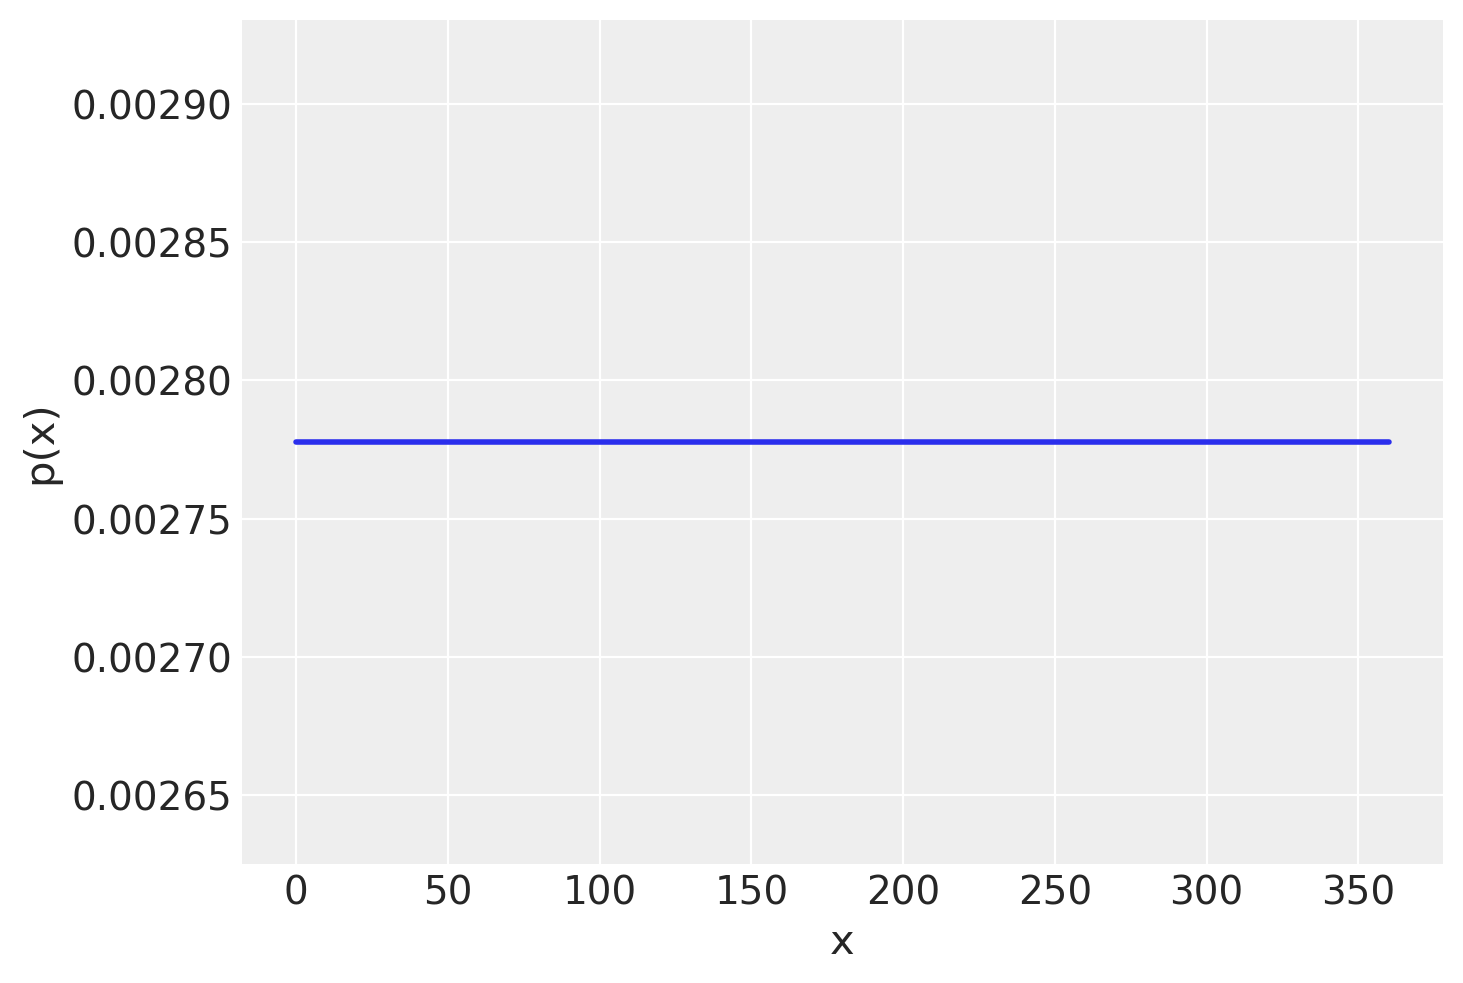

In [6]:
plt.figure()
x = np.linspace(0, 360, 100)
plt.plot(x, stats.uniform.pdf(x, 0, 360), lw=2, label="uniform pdf")
plt.xlabel("x")
plt.ylabel("p(x)");

In [7]:
100*1/360

0.2777777777777778

In [8]:
stats.uniform.cdf(250, 0, 360) - stats.uniform.cdf(150, 0, 360)

0.27777777777777773

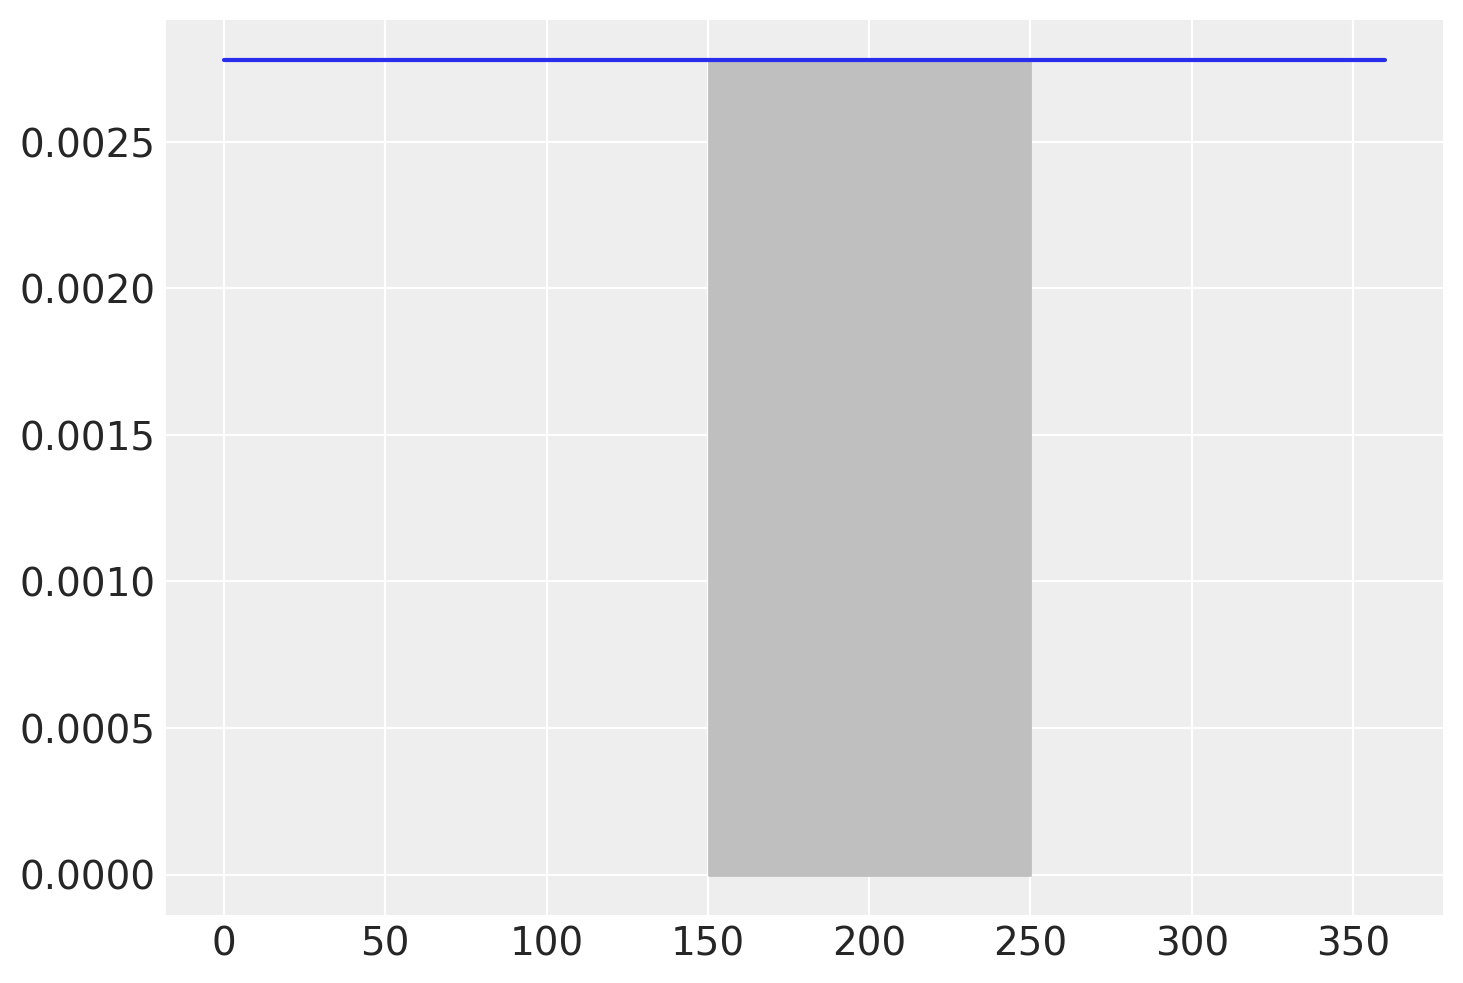

In [9]:
plt.figure()
x = np.linspace(0, 360, 1000)
fx = stats.uniform.pdf(x, 0, 360)
plt.plot(x, fx)
plt.fill_between(x, fx, where=(x >= 150) & (x <= 250), color="0.75");

In [10]:
stats.uniform.pdf([0.5, 0.8, 1.2])

array([1., 1., 0.])

In [11]:
stats.uniform.cdf([0.5, 0.8])

array([0.5, 0.8])

In [12]:
stats.uniform.cdf(0.8) - stats.uniform.cdf(0.5)

0.30000000000000004

In [13]:
stats.uniform.ppf([0.5, 0.8])

array([0.5, 0.8])

In [14]:
rng.uniform(0, 1, 5)

array([0.0468381 , 0.97410287, 0.22172336, 0.25820832, 0.51373068])

In [15]:
rng.uniform(0, 1, 100000).mean()

0.499343550684187

In [16]:
rng.uniform(0, 1, 100000).var()


0.08332946561136381

In [17]:
1 / 12

0.08333333333333333

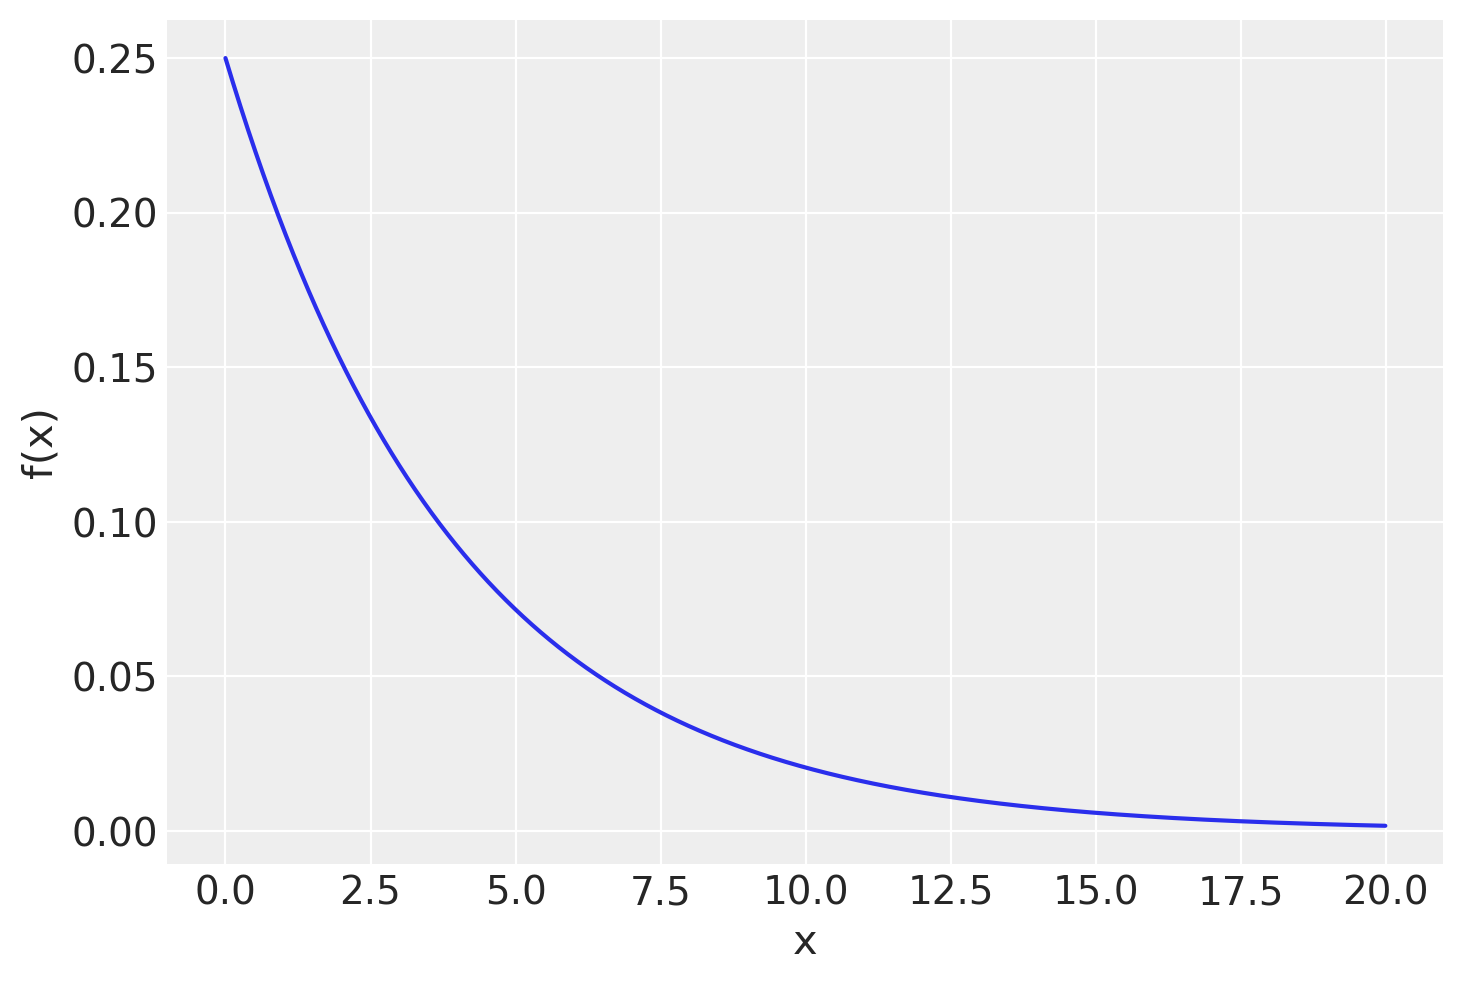

In [18]:
x = np.arange(0, 20, 0.01)
mu = 4
lam = 1 / mu
stdev = 1 / lam
pdf = stats.expon.pdf(x, loc=0, scale=stdev)

plt.figure()
plt.plot(x, pdf)
plt.xlabel("x")
plt.ylabel("f(x)");

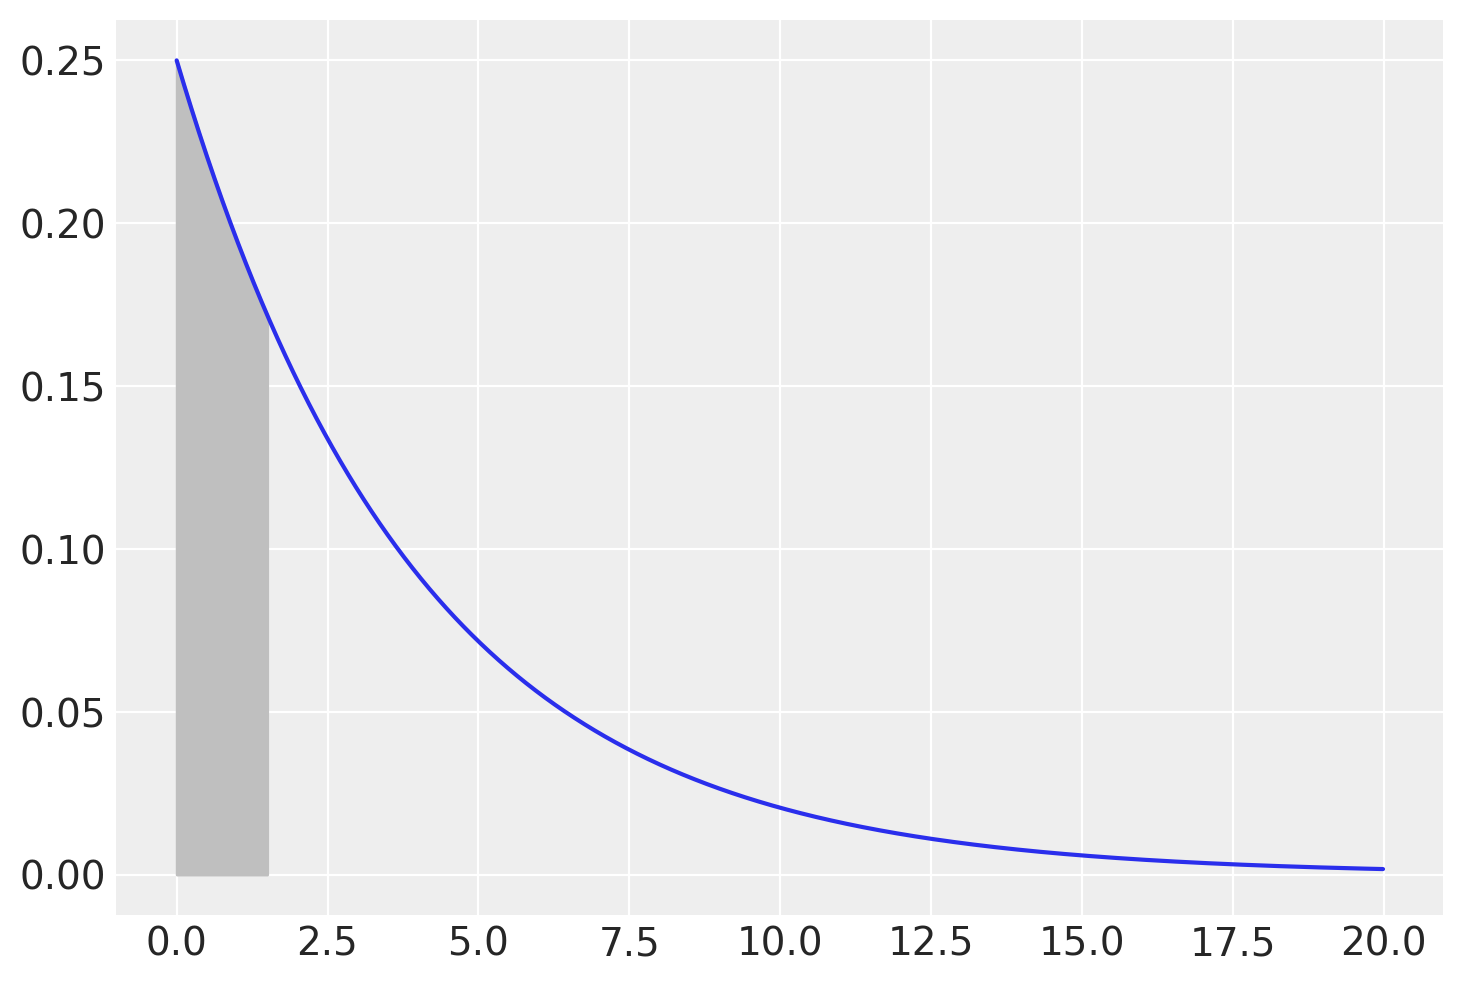

In [19]:
fx = stats.expon.pdf(x, loc=0, scale=stdev)

plt.figure()
plt.plot(x, fx)
plt.fill_between(x, fx, where=(x >= 0) & (x <= 1.5), color="0.75");

In [20]:
stats.expon.cdf(1.5, loc=0, scale=stdev) 

0.3127107212090278

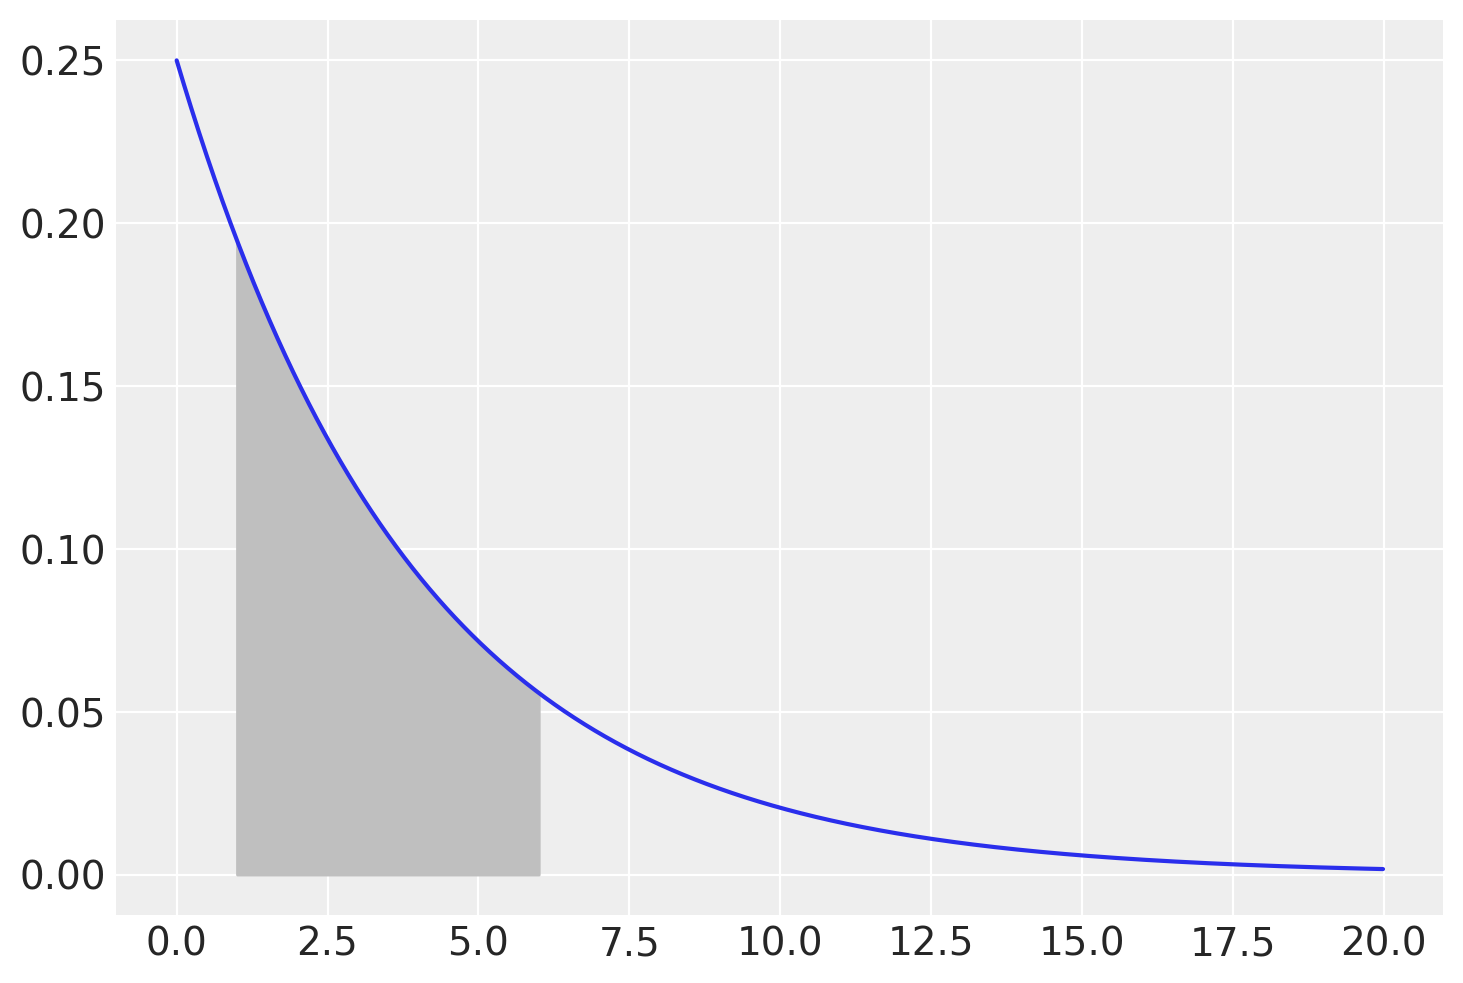

In [21]:
fx = stats.expon.pdf(x, loc=0, scale=stdev)

plt.figure()
plt.plot(x, fx)
plt.fill_between(x, fx, where=(x >= 1) & (x <= 6), color="0.75");

In [22]:
stats.expon.cdf(6, loc=0, scale=stdev) - stats.expon.cdf(1, loc=0, scale=stdev)

0.5556706229229751

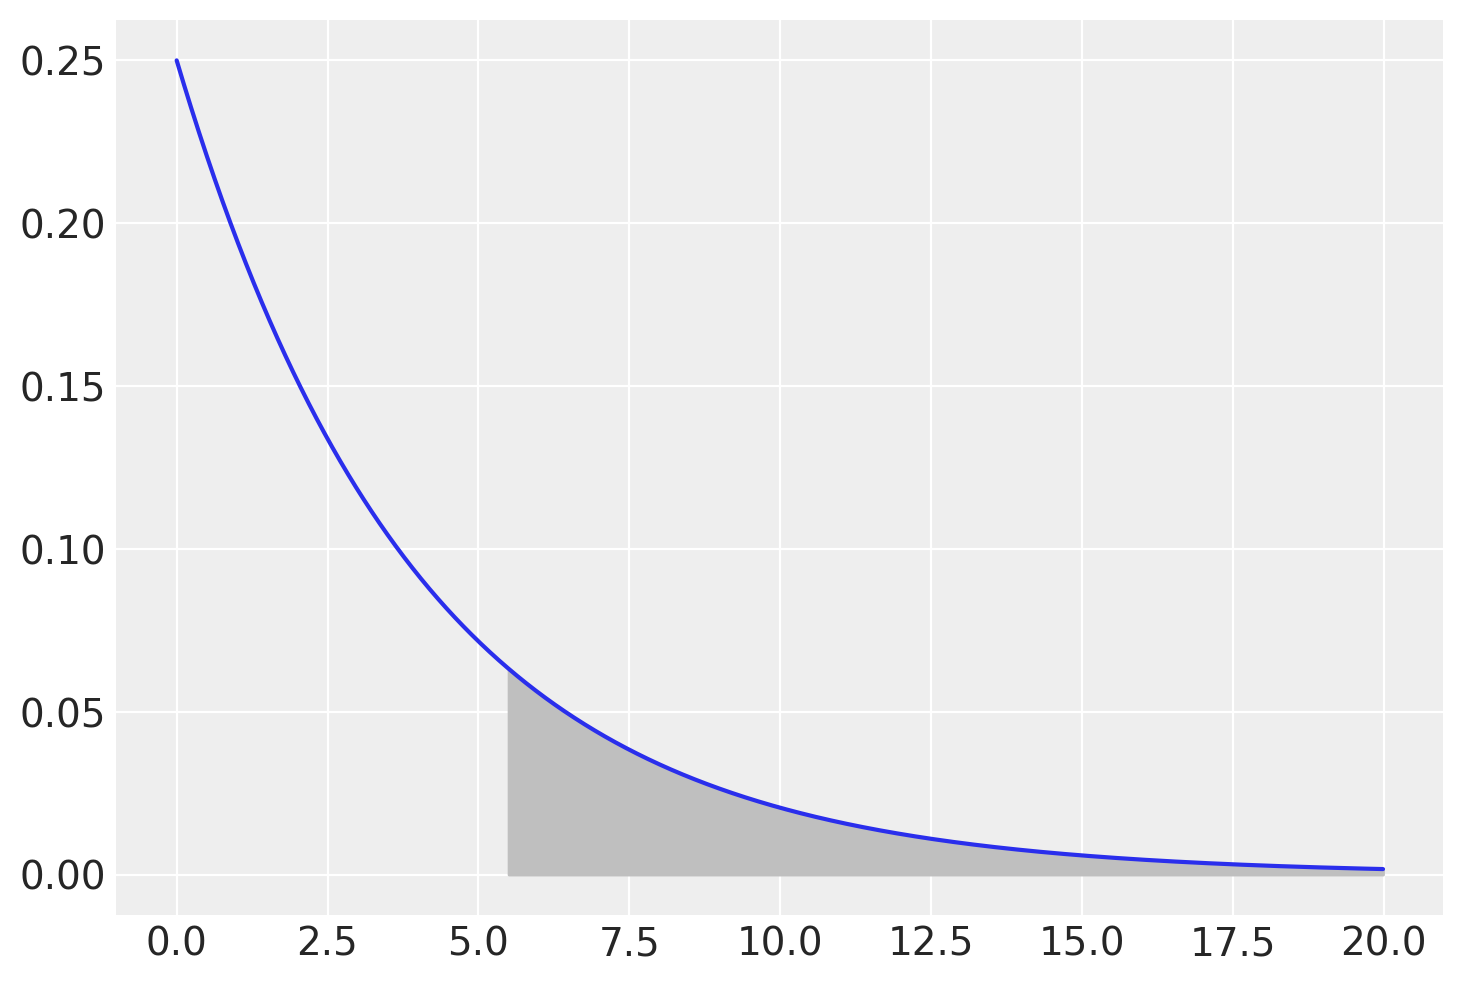

In [23]:
fx = stats.expon.pdf(x, loc=0, scale=stdev)

plt.figure()
plt.plot(x, fx)
plt.fill_between(x, fx, where=(x >= 5.5) & (x <= 21), color="0.75");

In [24]:
1 - stats.expon.cdf(5.5, loc=0, scale=stdev) 

0.25283959580474646

In [25]:
stats.expon.sf(5.5, loc=0, scale=stdev) 

0.25283959580474646

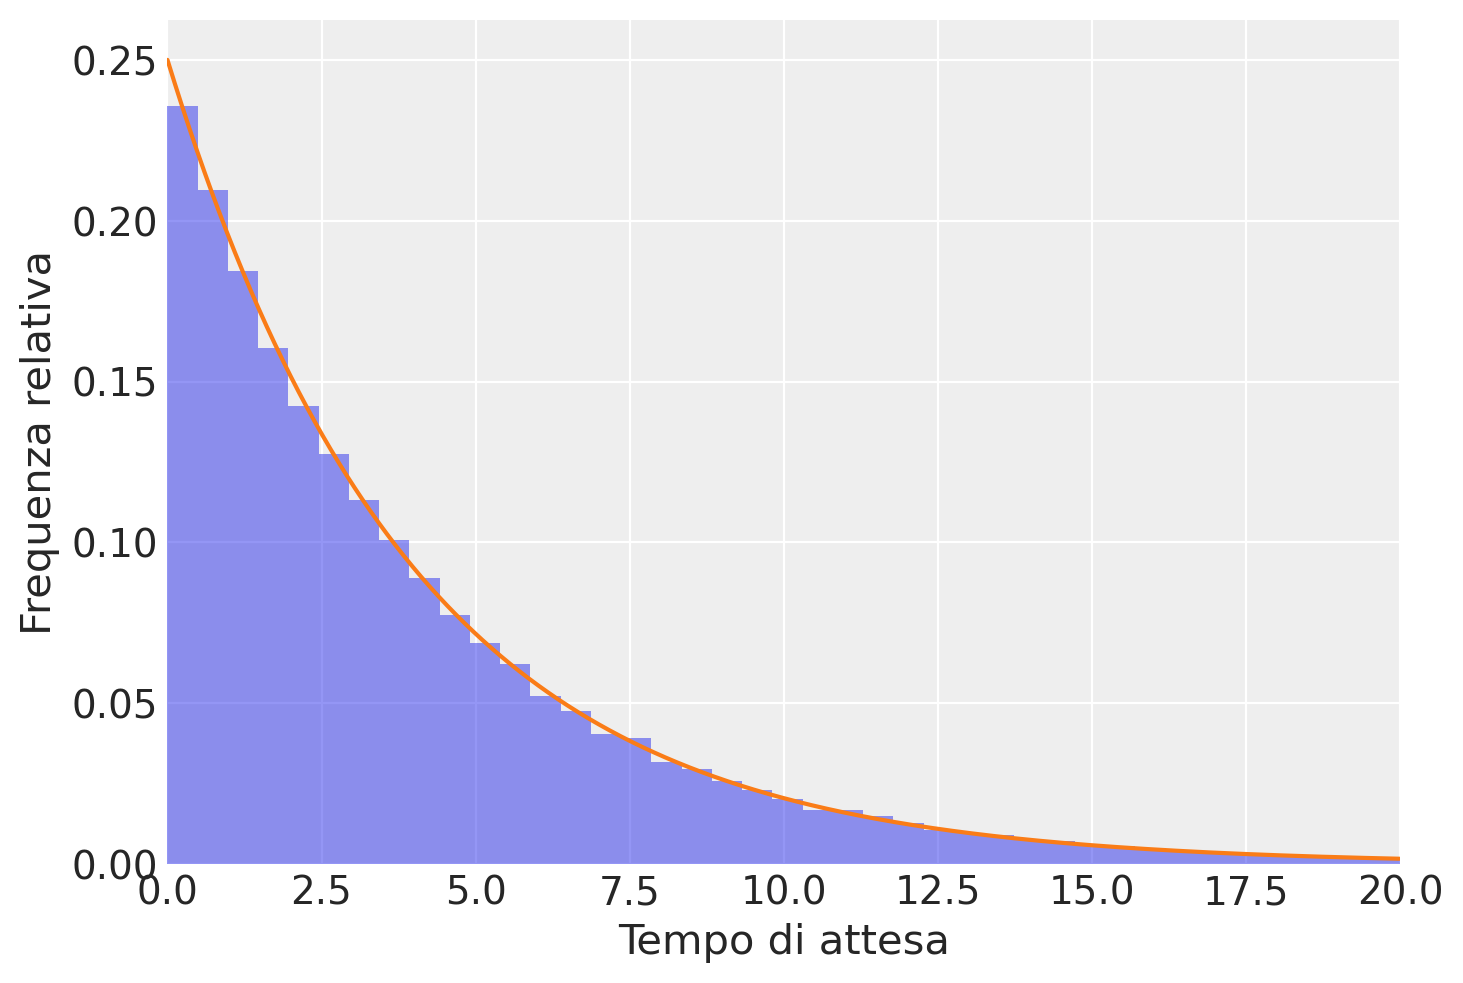

In [26]:
samps = rng.exponential(stdev, 100000)

plt.figure()
count, bins, ignored = plt.hist(samps, bins=100, density=True, alpha=0.5)
plt.plot(x, fx)
plt.xlim([0, 20])
plt.ylabel("Frequenza relativa")
plt.xlabel("Tempo di attesa");

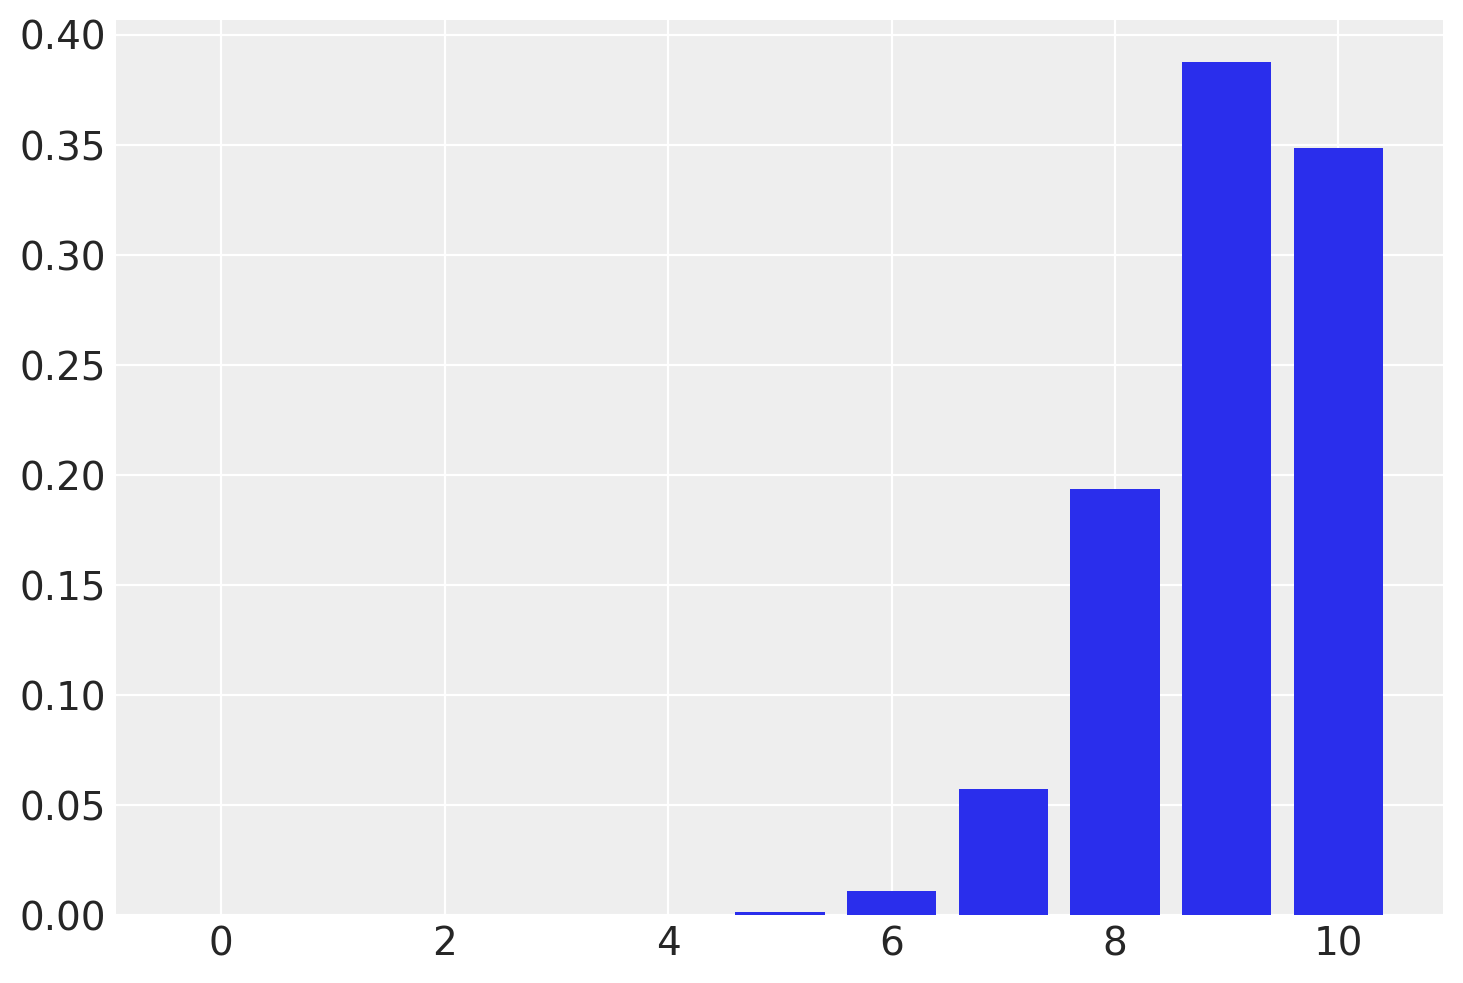

In [27]:
n = 10
p = 0.9
r_values = list(range(n + 1))
dist = [stats.binom.pmf(r, n, p) for r in r_values]

plt.figure()
plt.bar(r_values, dist);

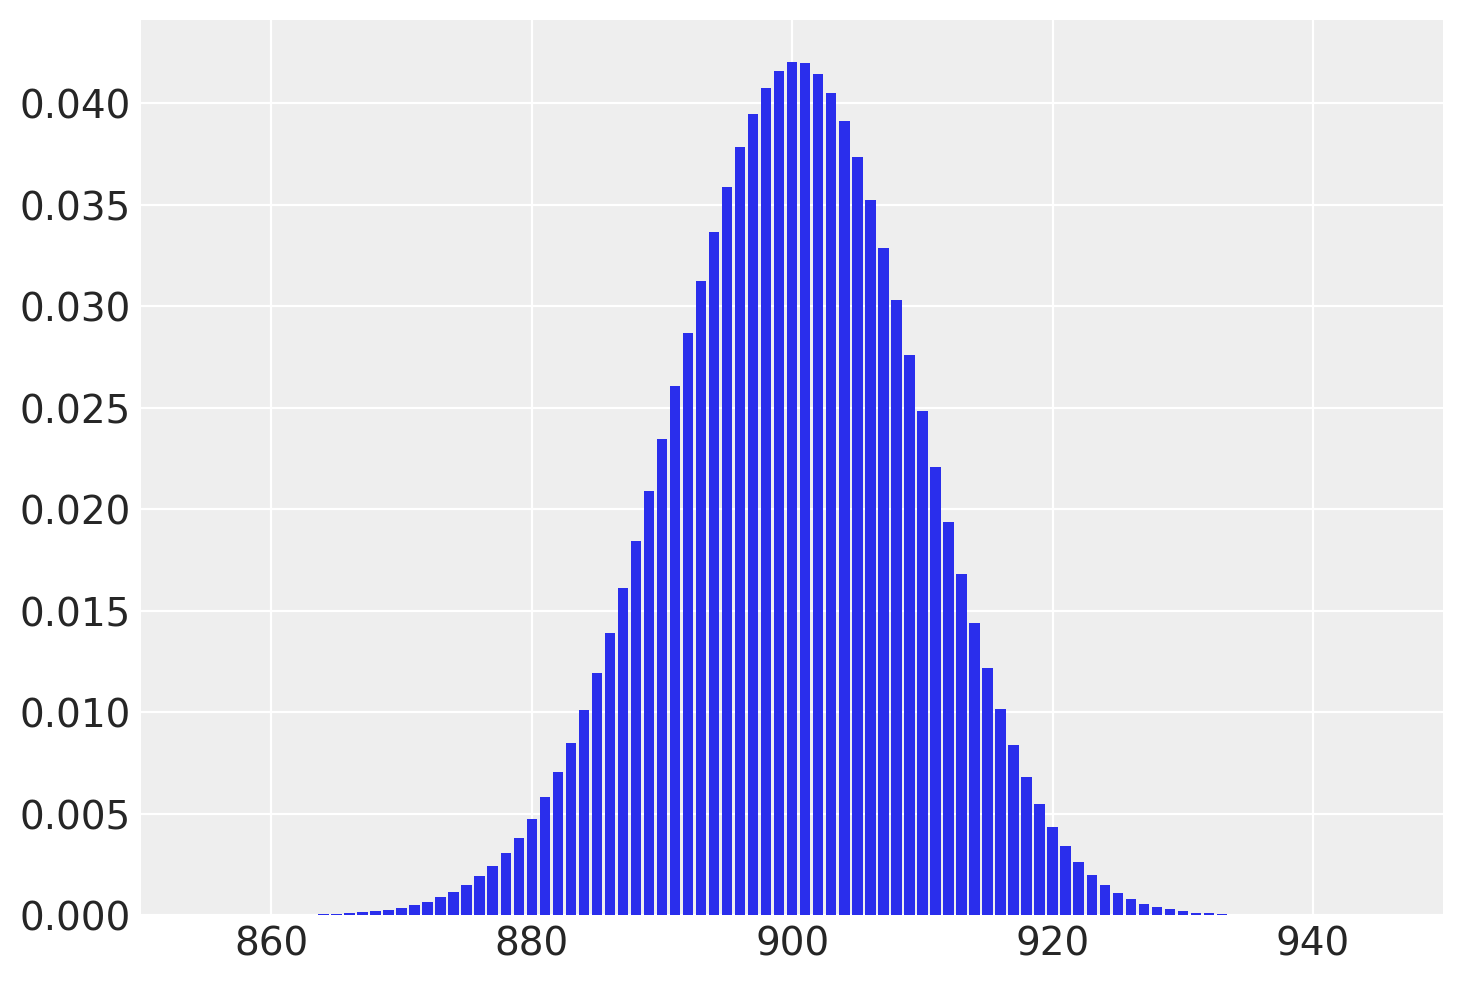

In [28]:
n = 1000
p = 0.9
r_values = list(range(n + 1))
dist = [stats.binom.pmf(r, n, p) for r in r_values]

plt.figure()
plt.bar(r_values, dist)
plt.xlim(850, 950);

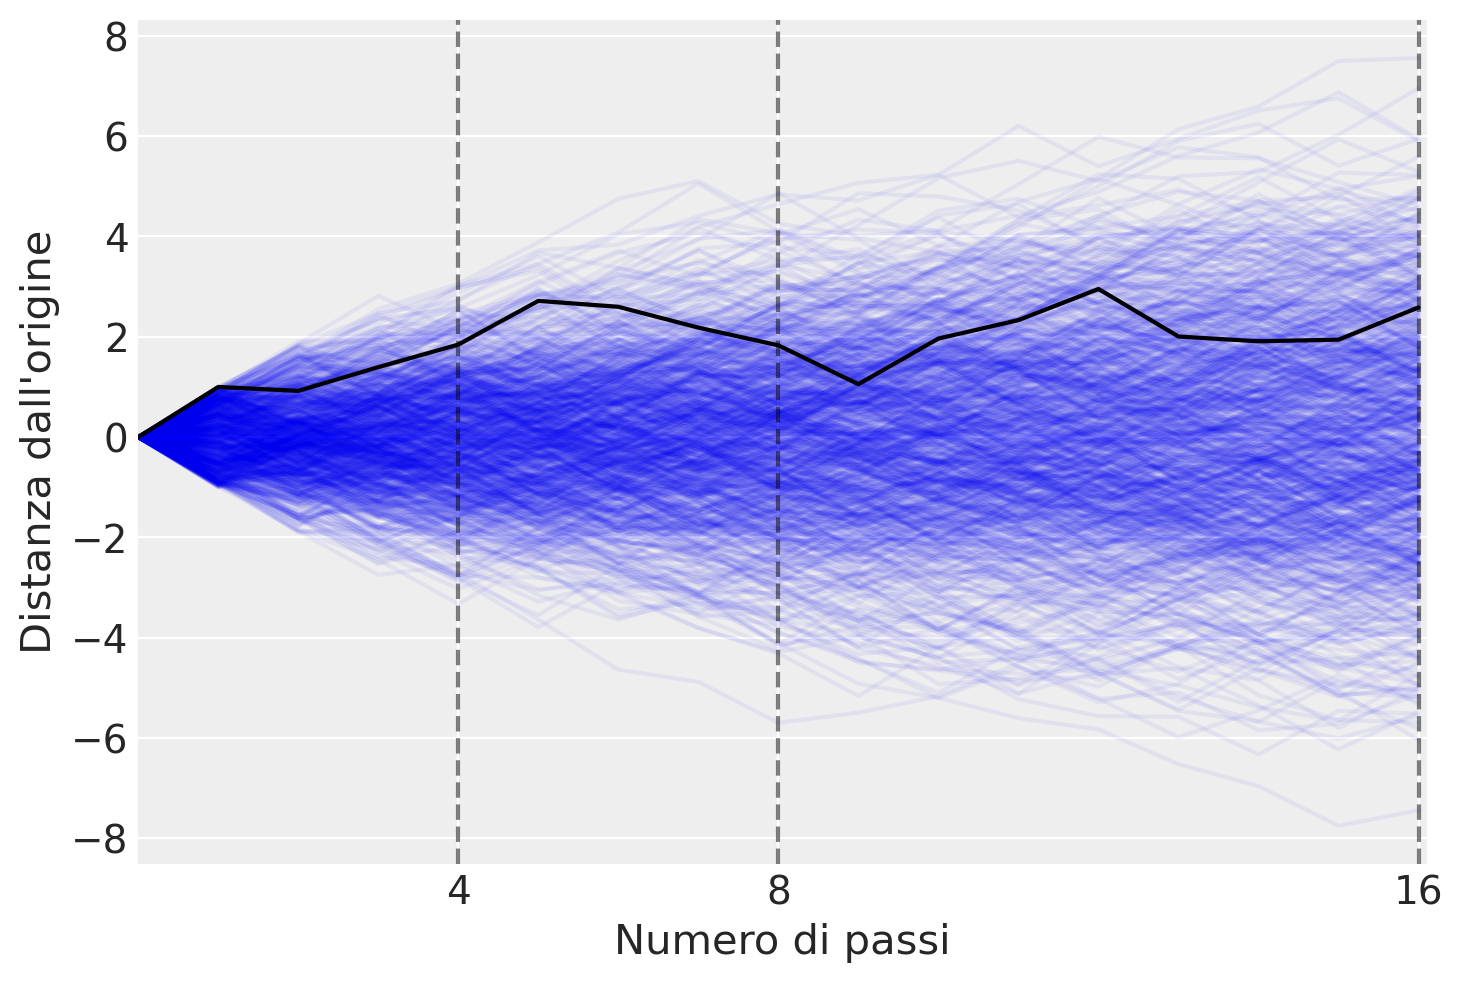

In [29]:
# Parametri della simulazione
numero_passi = 16  # Numero di passi per passeggiata
ripetizioni = 1000  # Numero di passeggiate da generare
punti_da_evidenziare = [4, 8, 16]  # Punti da evidenziare sul grafico

# Inizializza l'array per registrare le passeggiate casuali
x = np.zeros((numero_passi + 1, ripetizioni))

# Genera le passeggiate casuali
for i in range(ripetizioni):
    passi = rng.uniform(-1, 1, numero_passi)  # Genera passi casuali
    x[1:, i] = np.cumsum(passi)  # Calcola la posizione cumulativa

# Prepara il grafico
fig, ax = plt.subplots()
plt.plot(x, color="blue", alpha=0.05)  # Disegna tutte le passeggiate
plt.plot(x[:, 0], color="black")  # Evidenzia la prima passeggiata

# Evidenzia i punti specifici
for punto in punti_da_evidenziare:
    plt.axvline(punto, linestyle="--", color="black", alpha=0.5)

# Imposta etichette e aspetti del grafico
plt.xlabel("Numero di passi")
plt.ylabel("Distanza dall'origine")
ax.set_xticks(punti_da_evidenziare)
plt.xlim(0, numero_passi + 0.1)

# Mostra il grafico
plt.show()

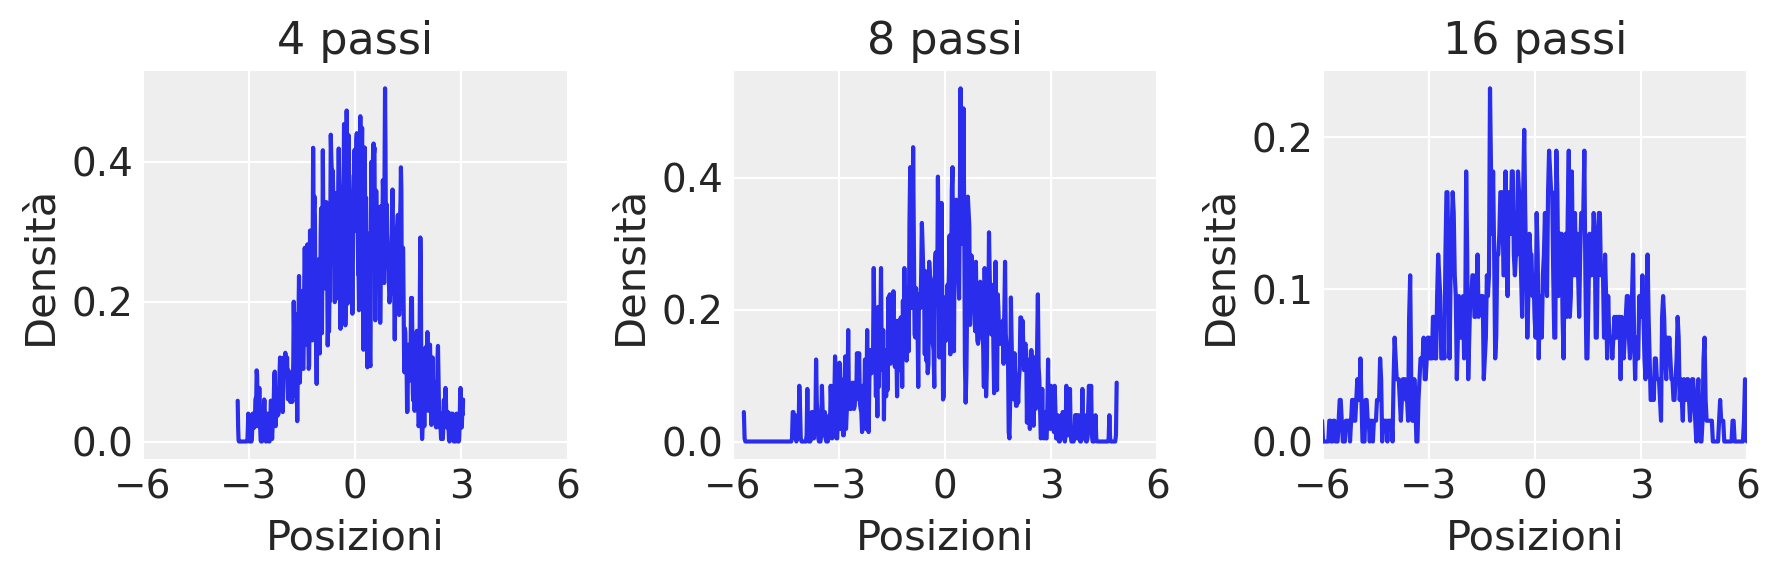

In [30]:
# Crea una figura con 3 subplots in orizzontale, condividendo l'asse X
fig, axs = plt.subplots(1, 3, figsize=(9, 3), sharex=True)

# Itera sui punti da evidenziare e sugli assi corrispondenti
for step, ax in zip(punti_da_evidenziare, axs):
    # Estrae le posizioni al passo specificato per tutte le ripetizioni
    posizioni_al_passo = x[step, :]
    
    az.plot_kde(posizioni_al_passo, bw=0.01, ax=ax)
    
    ax.set_title(f"{step} passi")
    ax.set_ylabel("Densità")
    ax.set_xlabel("Posizioni")
    ax.set_xlim(-6, 6)
    ax.set_xticks([-6, -3, 0, 3, 6])

plt.tight_layout() 
plt.show()

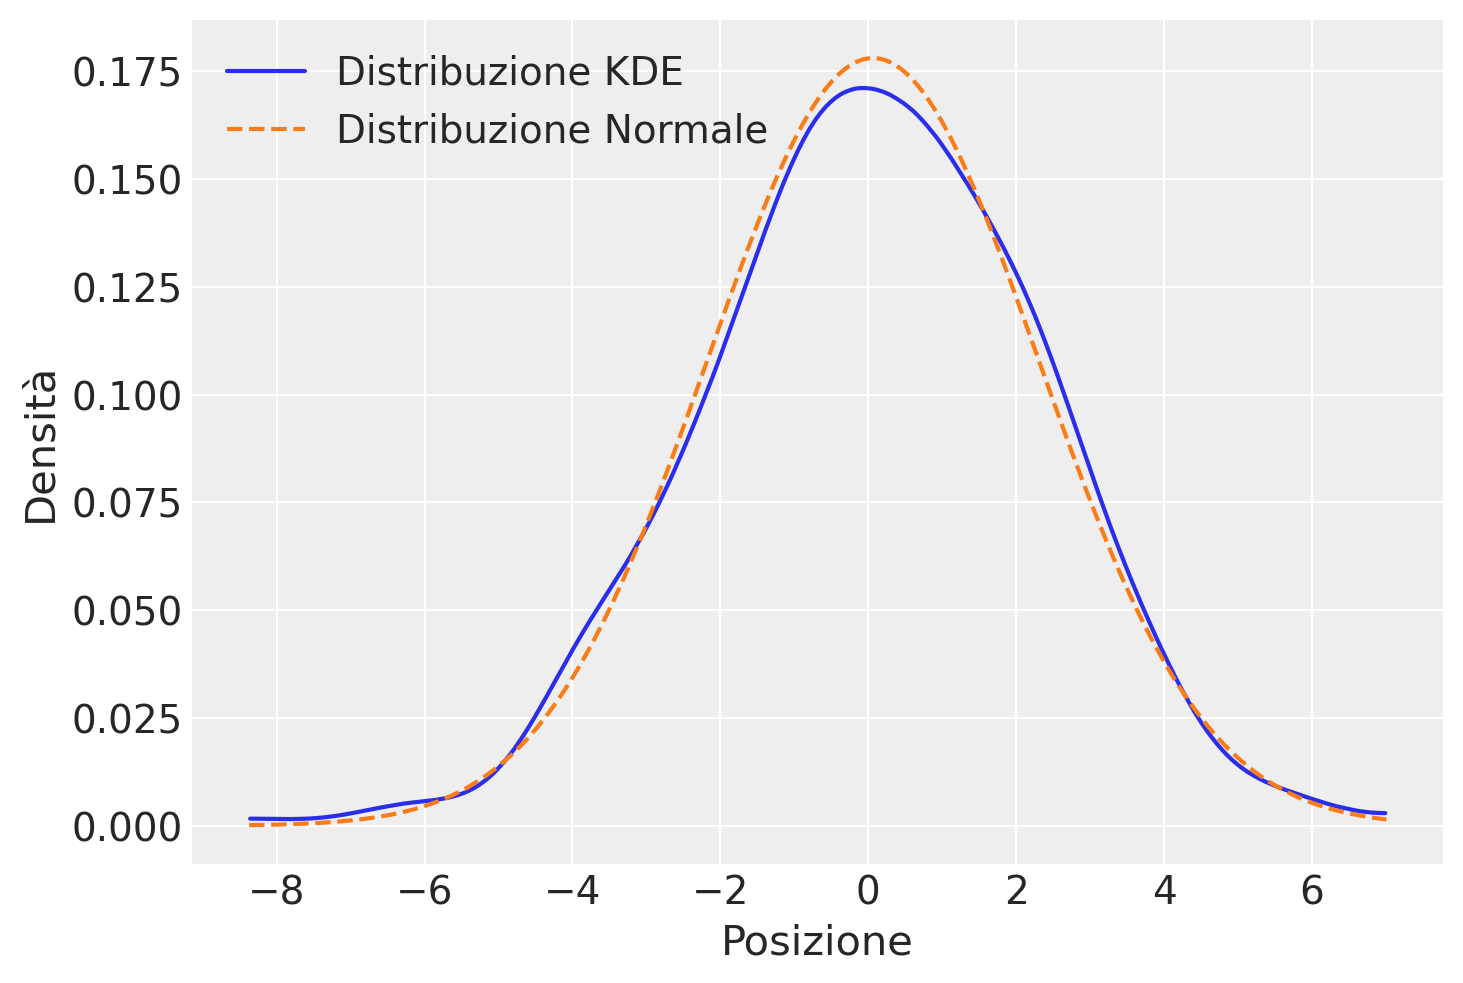

In [31]:
# Genera la distribuzione uniforme e calcola la somma come prima
pos = rng.uniform(-1, 1, size=(16, 1000)).sum(0)

# Calcola media e deviazione standard dei dati generati
media, dev_std = np.mean(pos), np.std(pos)

# Spazio dei valori per la distribuzione normale
valori = np.linspace(np.min(pos), np.max(pos), 1000)

# Calcola la distribuzione normale con la stessa media e deviazione standard
distribuzione_normale = stats.norm.pdf(valori, media, dev_std)

# Disegna la stima della densità kernel dei dati
az.plot_kde(pos, label='Distribuzione KDE')

# Sovrappone la distribuzione normale
plt.plot(valori, distribuzione_normale, label='Distribuzione Normale', color = "C1", linestyle='--')

plt.xlabel("Posizione")
plt.ylabel("Densità")
_ = plt.legend()

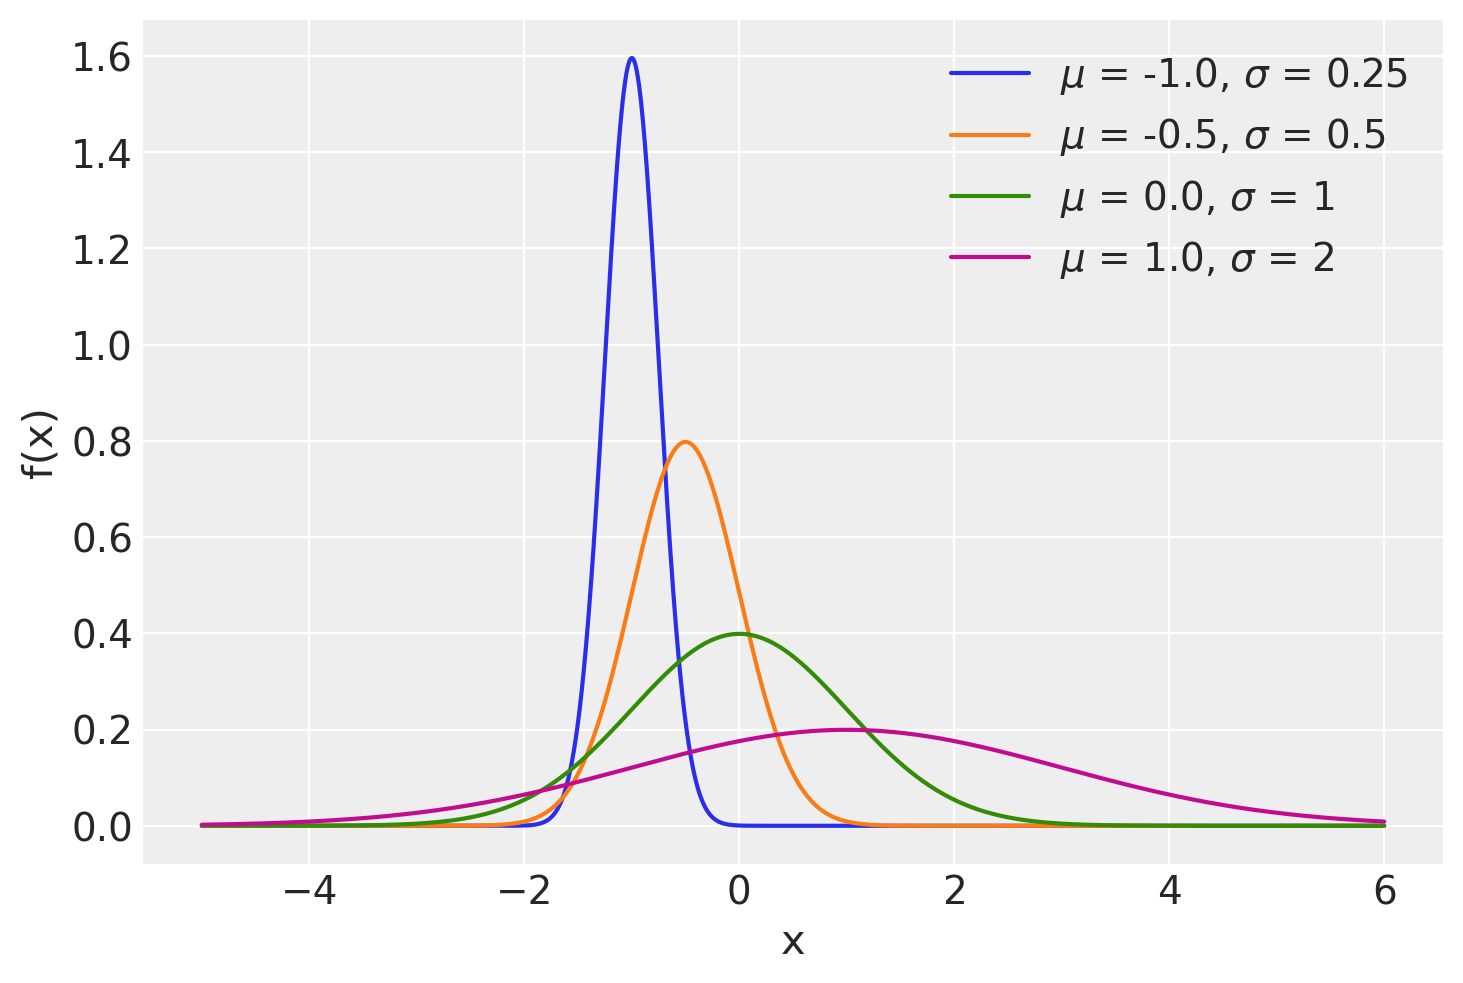

In [32]:
x = np.arange(-5, 6, 0.001)

mus = [-1.0, -0.5, 0.0, 1.0]
sigmas = [0.25, 0.5, 1, 2]

plt.figure()

for mu, sigma in zip(mus, sigmas):
    pdf = stats.norm.pdf(x, mu, sigma)
    plt.plot(x, pdf, label=r"$\mu$ = {}, $\sigma$ = {}".format(mu, sigma))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc=1);

In [33]:
rng.normal(loc=100, scale=15, size=1)

array([129.33365831])

In [34]:
qi = rng.normal(loc=100, scale=15, size=10)
print(qi)

[101.75540712 110.9725082  113.23318019  99.60961172 110.01975265
 116.40862953  95.54508879 111.60807009 115.11694095  78.66141948]


In [35]:
stats.norm.cdf(115, 100, 15)

0.8413447460685429

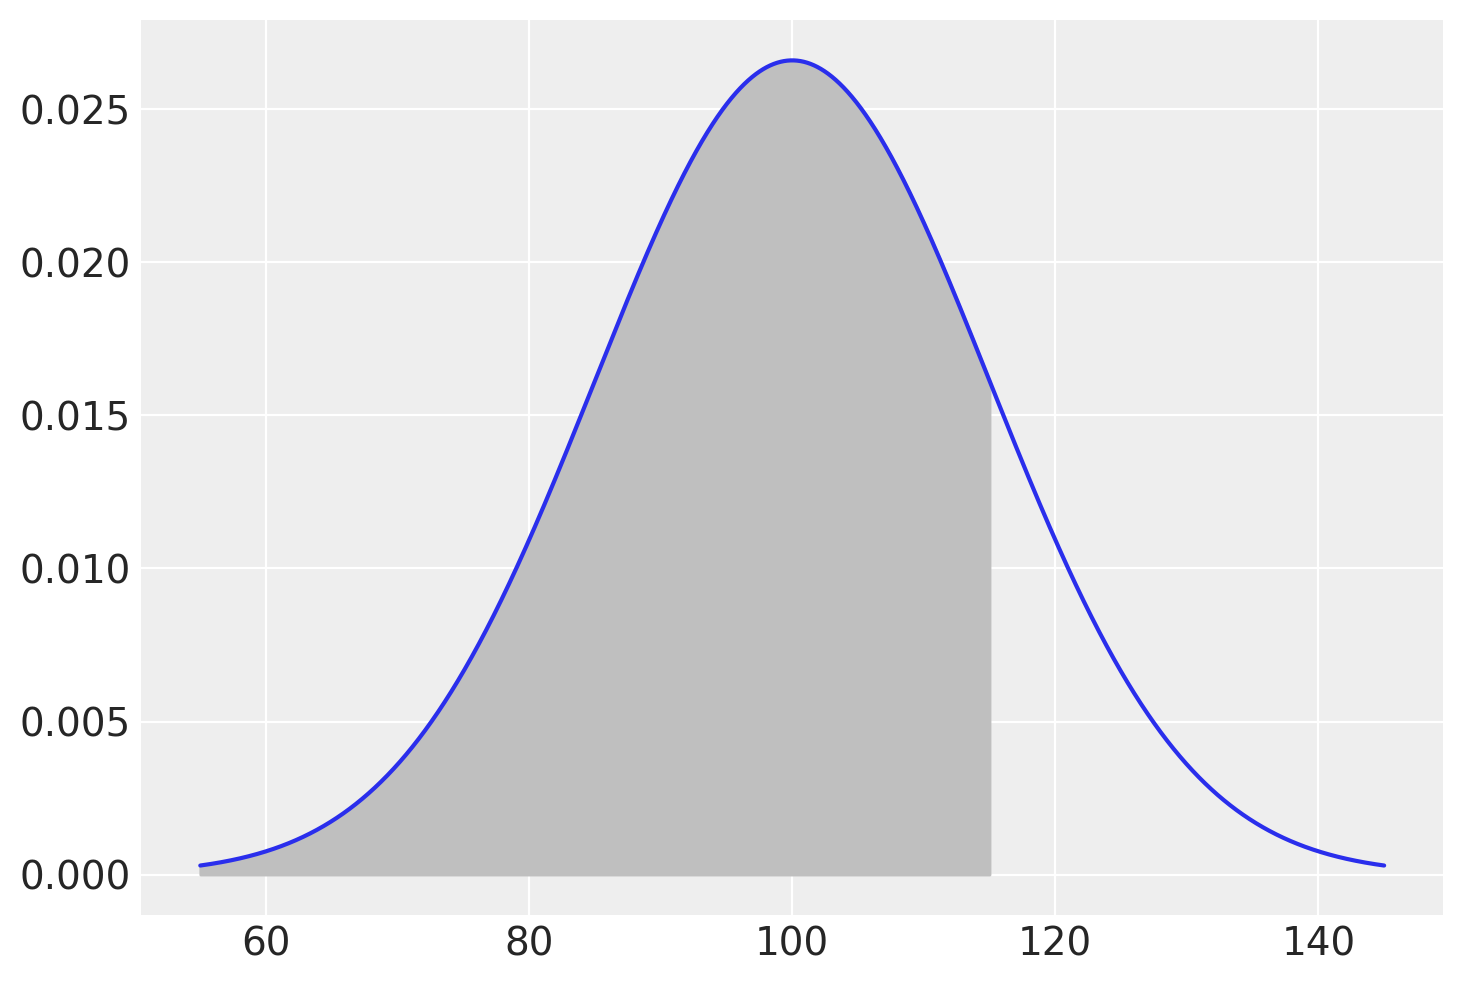

In [36]:
mu = 100
sigma = 15
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 10000)
fx = stats.norm.pdf(x, mu, sigma)

plt.figure()
plt.plot(x, fx)
_ = plt.fill_between(x, fx, where=x <= 115, color="0.75")

In [37]:
def gaussian(x, mu, sig):
    return (
        1.0 / (np.sqrt(2.0 * np.pi) * sig) * np.exp(-np.power((x - mu) / sig, 2.0) / 2)
    )

mu = 100
sigma = 15
result, error = quad(gaussian, -1000, 115, args=(mu, sigma))
print("Il risultato è", result, "con errore", error)

Il risultato è 0.8413447460685429 con errore 4.0191197364560644e-10


In [38]:
1 - stats.norm.cdf(130, 100, 15)

0.02275013194817921

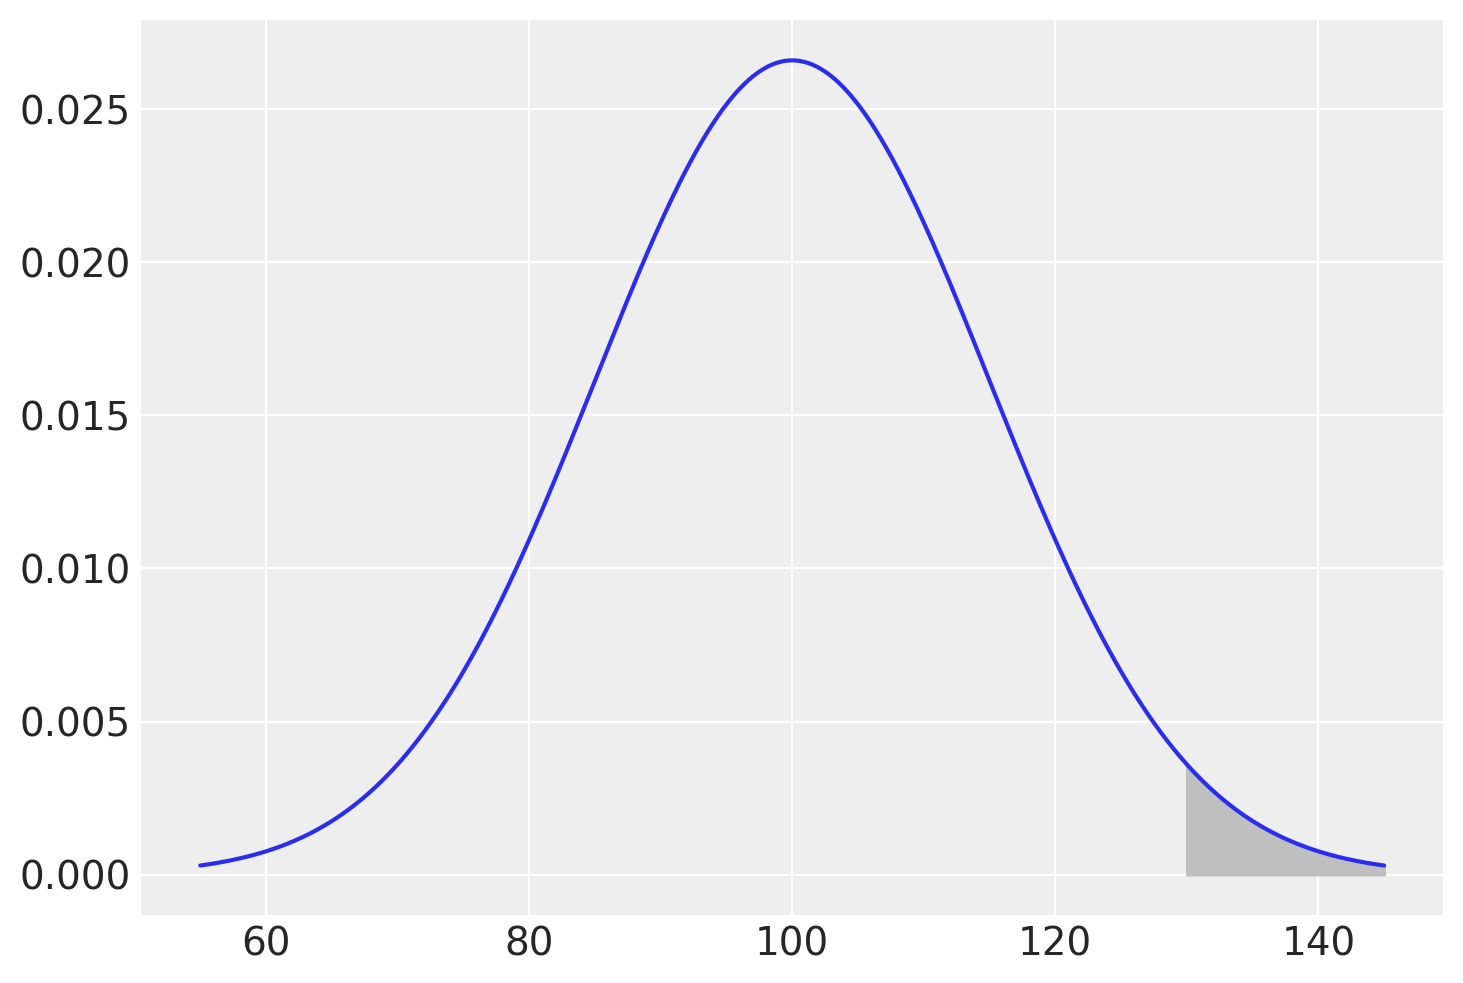

In [39]:
plt.figure()
plt.plot(x, fx)
plt.fill_between(x, fx, where=x >= 130, color="0.75");

In [40]:
stats.norm.sf(130, 100, 15)

0.022750131948179198

In [41]:
stats.norm.ppf(1 - 0.022750131948179195, 100, 15)

130.0

In [42]:
stats.norm.cdf(1.8, 1.7, 0.1) - stats.norm.cdf(1.7, 1.7, 0.1)

0.34134474606854315

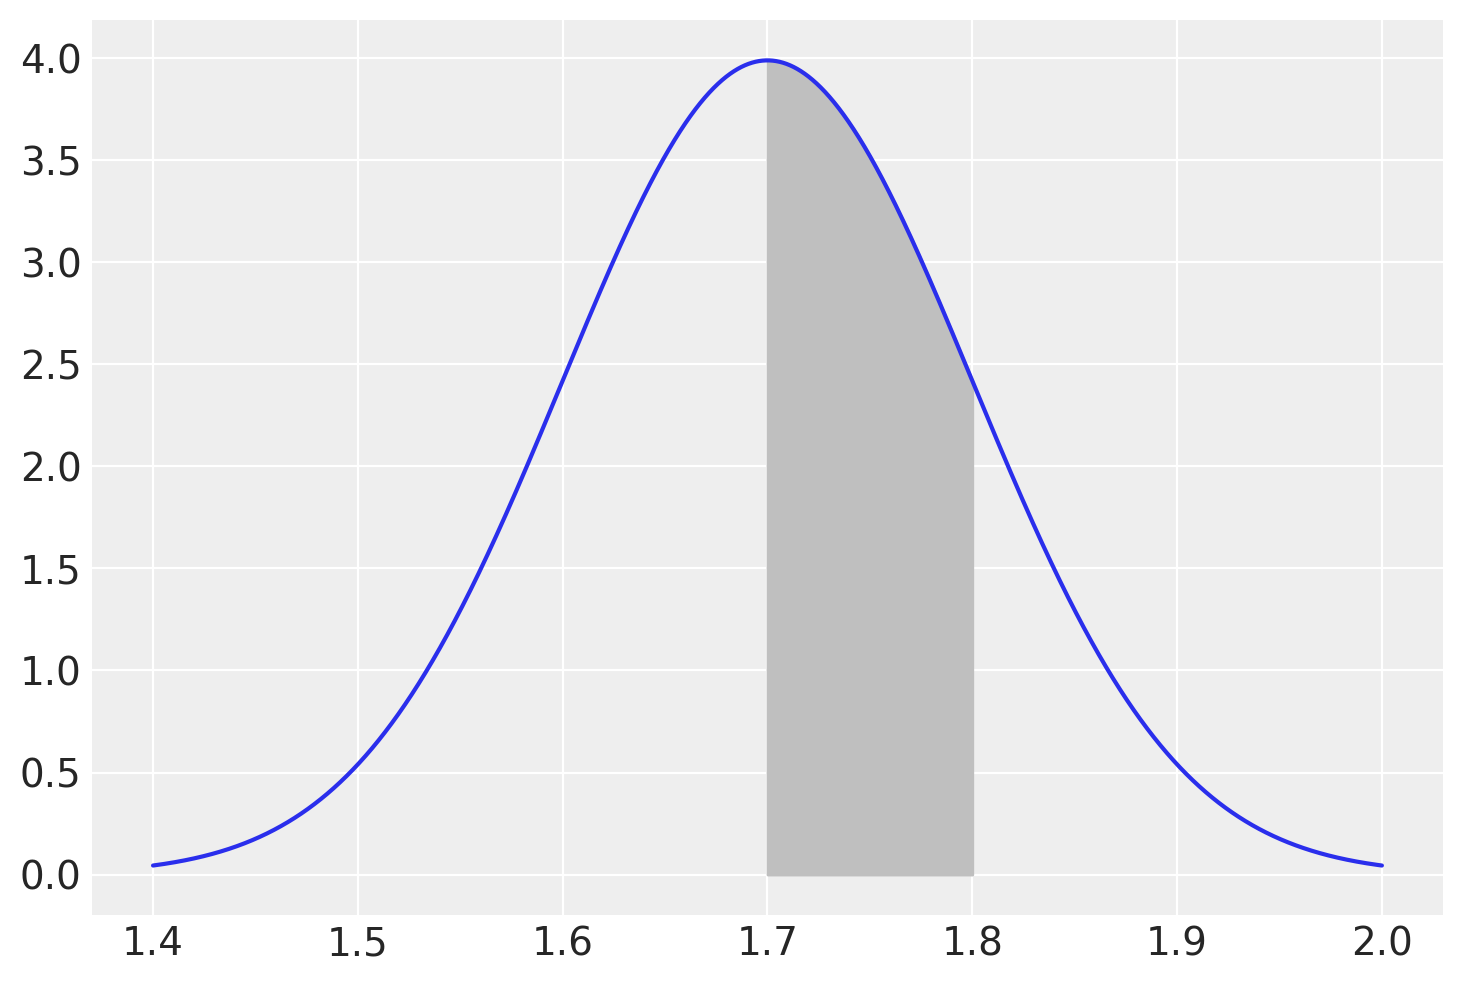

In [43]:
mu = 1.7
sigma = 0.1
x = np.linspace(mu - 3 * sigma, mu + 3 * sigma, 10000)
fx = stats.norm.pdf(x, mu, sigma)
plt.figure()
plt.plot(x, fx)
plt.fill_between(x, fx, where=(x >= 1.7) & (x <= 1.8), color="0.75");

In [44]:
stats.norm.cdf(1.0, 0, 1) - stats.norm.cdf(0, 0, 1)

0.3413447460685429

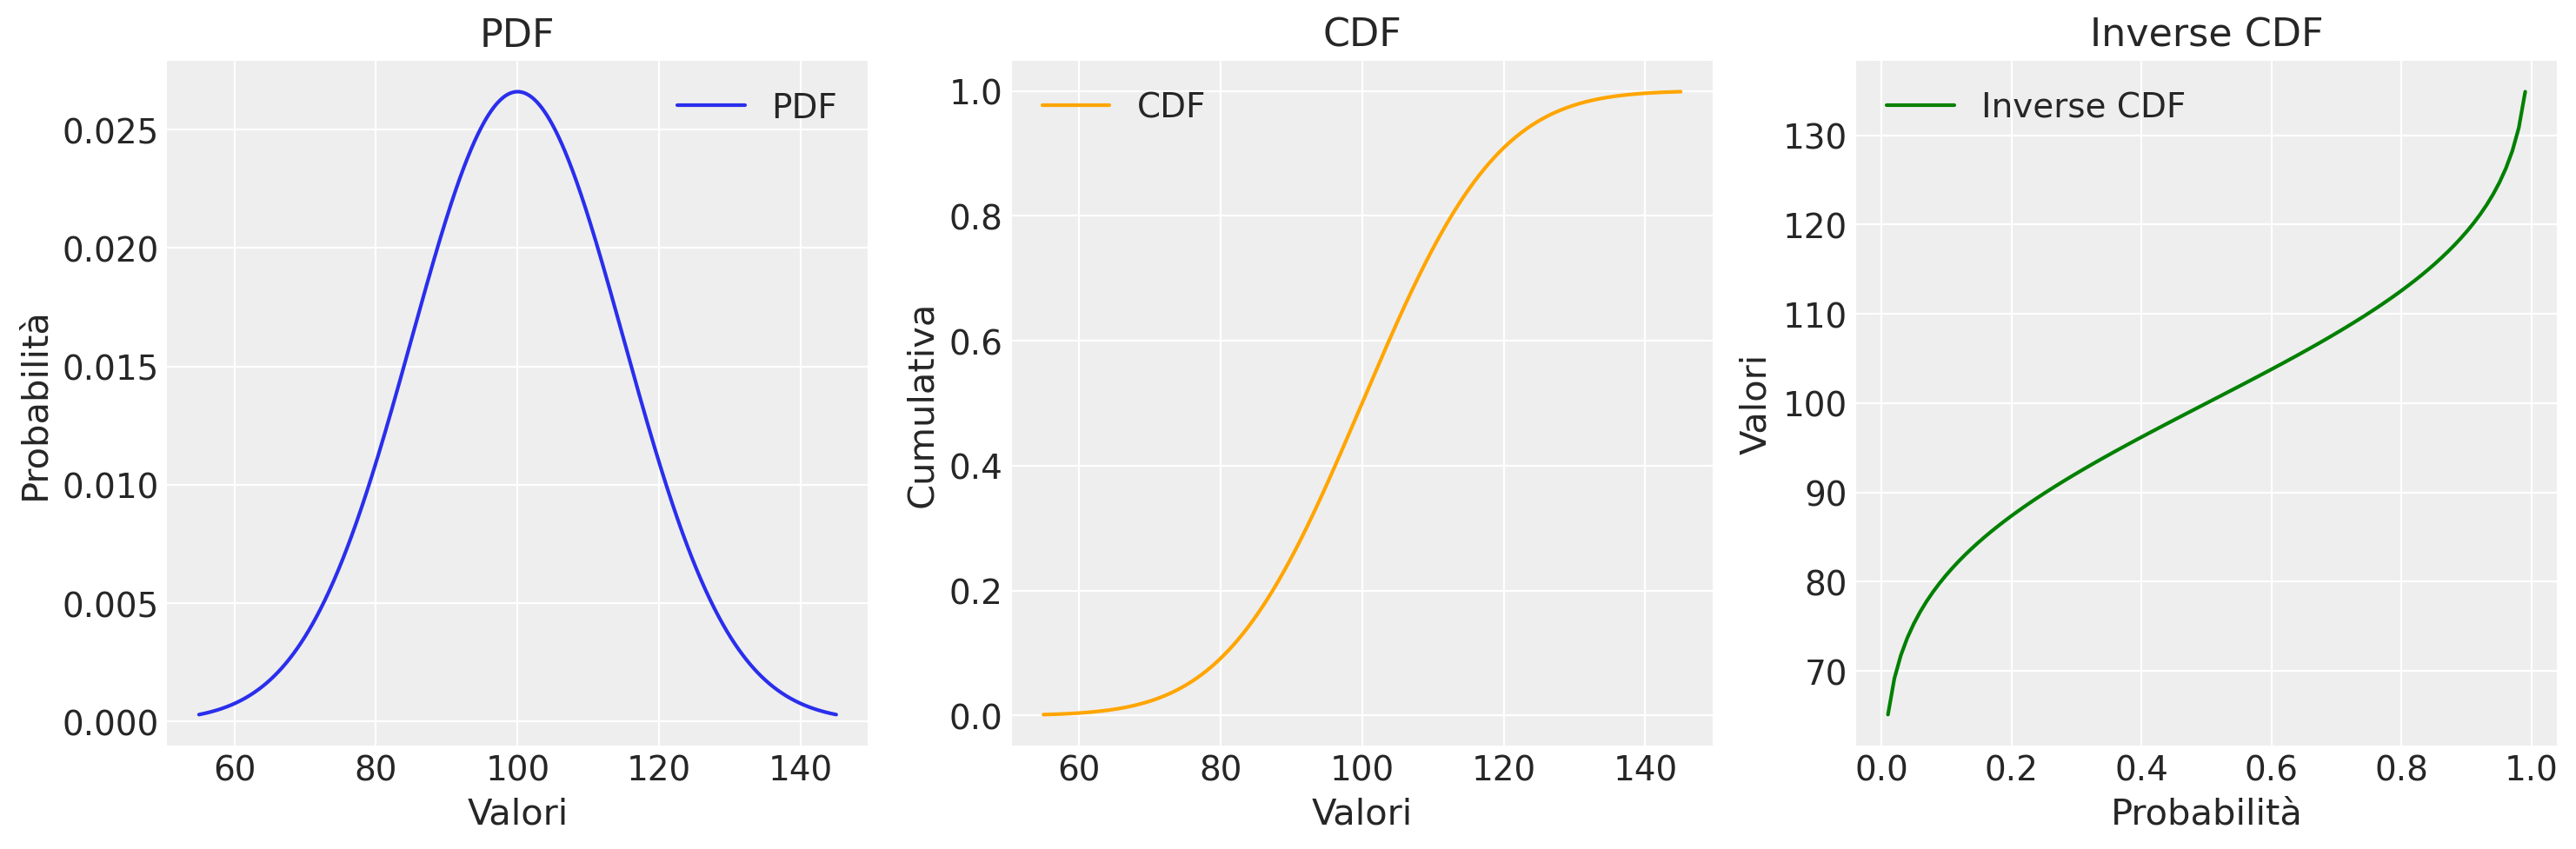

In [45]:
# Definisco i parametri della distribuzione
mu = 100
sigma = 15

# Creo un range di valori su cui calcolare le funzioni
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)

# Calcolo la PDF, CDF, e l'inverso della CDF
pdf = stats.norm.pdf(x, mu, sigma)
cdf = stats.norm.cdf(x, mu, sigma)
ppf = stats.norm.ppf(np.linspace(0.01, 0.99, 100), mu, sigma)  # Evitiamo 0 e 1 per l'inverso

# Creo i grafici in una sola riga
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Grafico della PDF
axs[0].plot(x, pdf, label='PDF')
axs[0].set_title('PDF')
axs[0].set_xlabel('Valori')
axs[0].set_ylabel('Probabilità')
axs[0].legend()

# Grafico della CDF
axs[1].plot(x, cdf, label='CDF', color='orange')
axs[1].set_title('CDF')
axs[1].set_xlabel('Valori')
axs[1].set_ylabel('Cumulativa')
axs[1].legend()

# Grafico dell'inverso della CDF
axs[2].plot(np.linspace(0.01, 0.99, 100), ppf, label='Inverse CDF', color='green')
axs[2].set_title('Inverse CDF')
axs[2].set_xlabel('Probabilità')
axs[2].set_ylabel('Valori')
axs[2].legend()

plt.tight_layout()
plt.show()

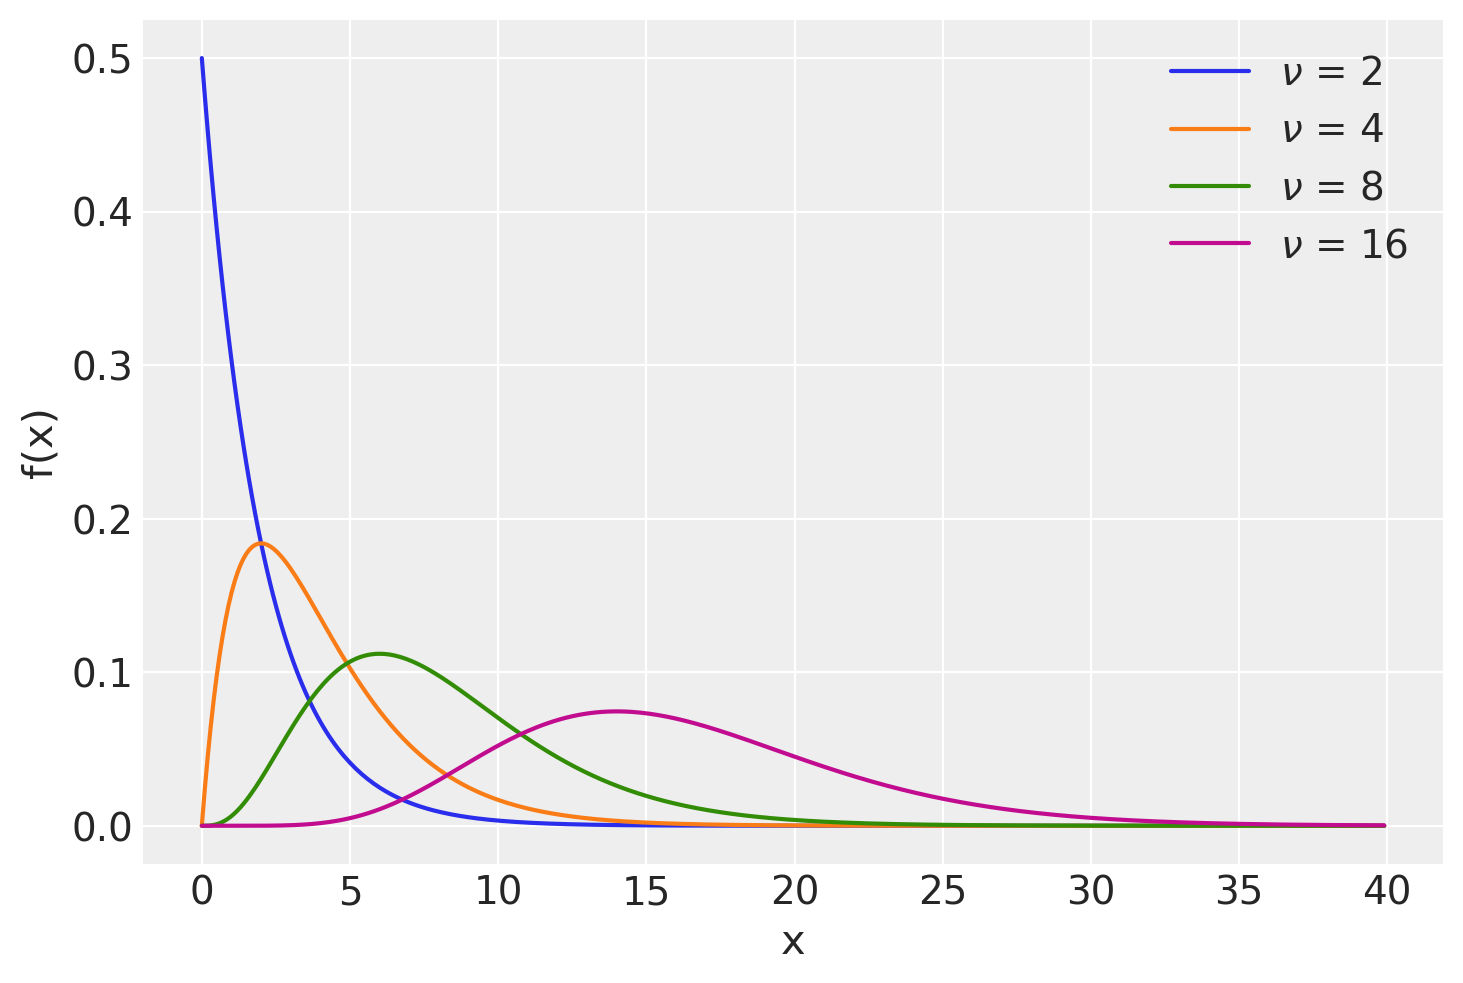

In [46]:
x = np.arange(0, 40, 0.1)

nus = [2, 4, 8, 16]
plt.figure()
for nu in nus:
    pdf = stats.chi2.pdf(x, nu)
    plt.plot(x, pdf, label=r"$\nu$ = {}".format(nu))
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc=1);

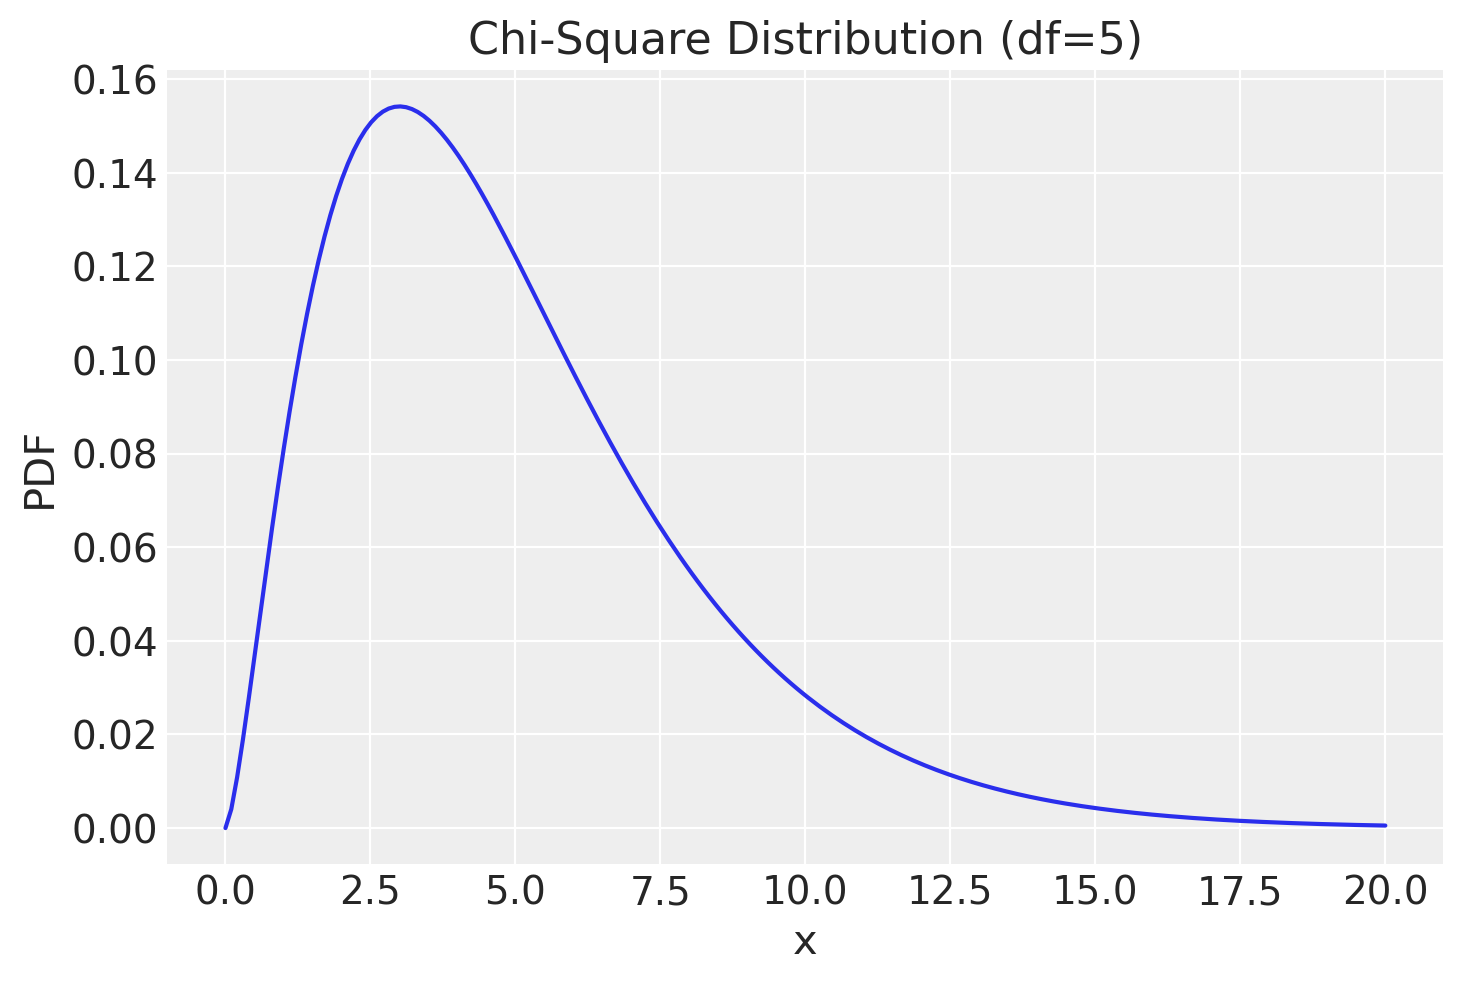

In [47]:
# Set the degrees of freedom
df = 5

# Create a chi-square distribution object
chi2_dist = stats.chi2(df)

# Generate x values for the plot
x = np.linspace(0, 20, 200)

# Calculate the probability density function (PDF) of the chi-square distribution for x values
pdf = chi2_dist.pdf(x)

# Plot the PDF
plt.figure()
plt.plot(x, pdf)
plt.title('Chi-Square Distribution (df=5)')
plt.xlabel('x')
plt.ylabel('PDF');

In [48]:
x = rng.chisquare(5, 1000000)
x[0:20]

array([ 3.49546716,  3.40268362,  4.66896963,  2.6705682 , 10.41753383,
        2.47990557,  3.24388541,  5.75735006,  2.82505351,  8.14374493,
        6.16016294, 13.64543555,  5.23728336,  1.57740809,  7.85140493,
        4.35852761,  1.21494328,  5.57597864,  3.86118063,  5.05981159])

In [49]:
np.mean(x)

4.995523467093458

In [50]:
np.var(x, ddof=0)

9.98729862775284

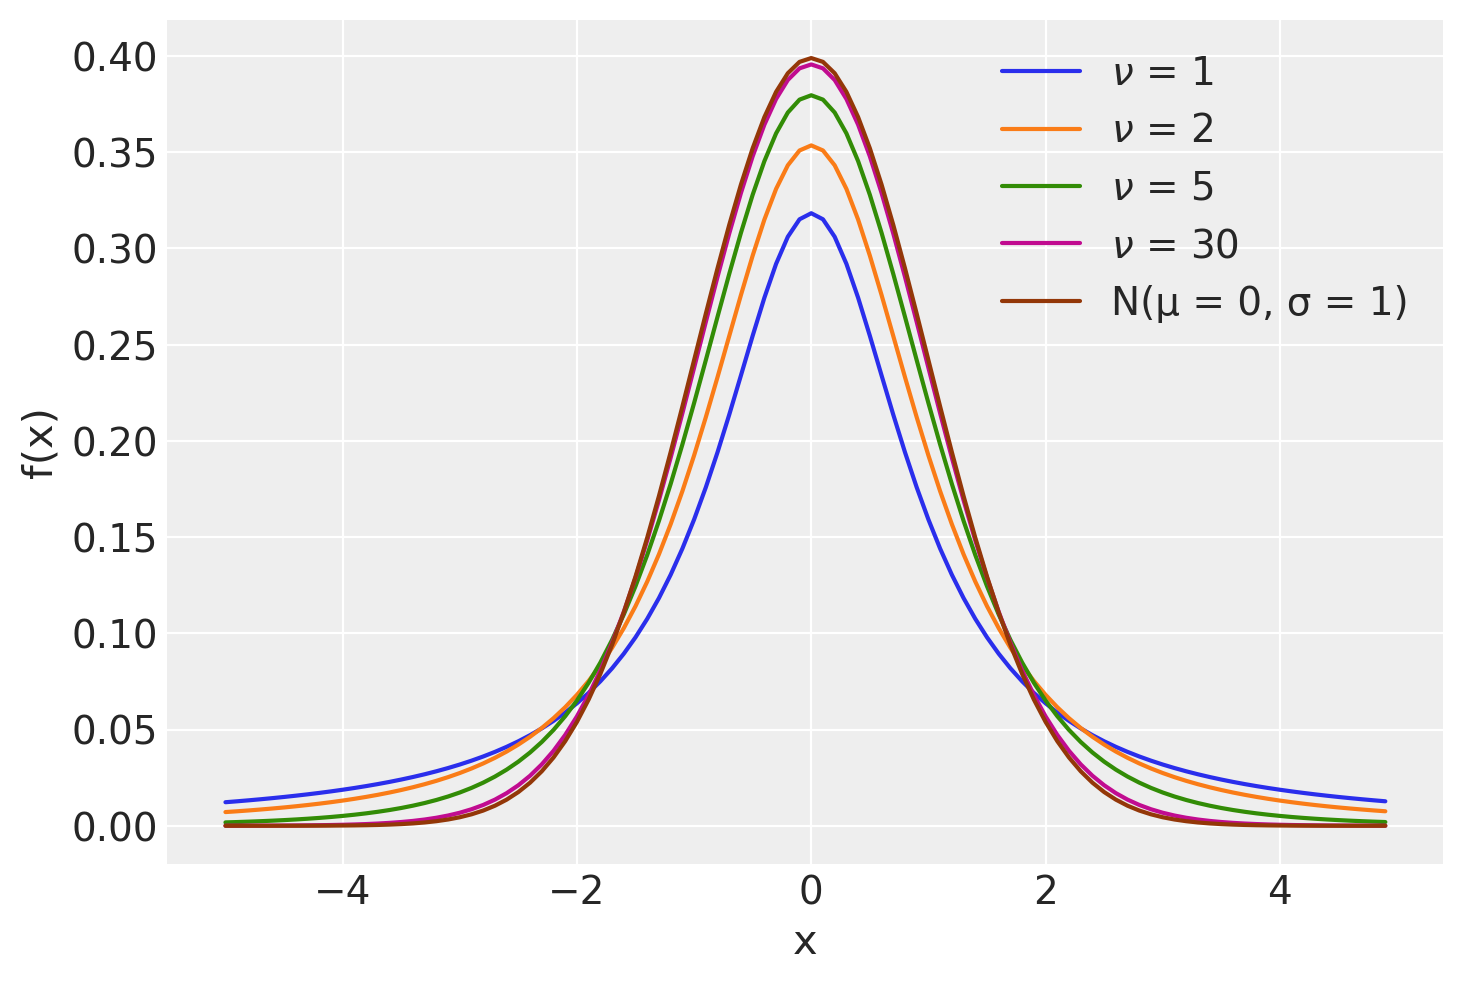

In [51]:
x = np.arange(-5, 5, 0.1)

nus = [1, 2, 5, 30]

plt.figure()
for nu in nus:
    pdf = stats.t.pdf(x, nu)
    plt.plot(x, pdf, label=r"$\nu$ = {}".format(nu))
plt.plot(x, stats.norm.pdf(x, 0, 1), label="N(μ = 0, σ = 1)")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend(loc=1);

In [52]:
stats.t.ppf(0.025, 30)

-2.042272456301238

In [53]:
stats.t.ppf(0.025, 1000)

-1.9623390808264078

In [54]:
stats.norm.ppf(0.025, 0, 1)

-1.9599639845400545

In [55]:
alpha = 3
beta = 9
sc.beta(alpha, beta)

0.00202020202020202

In [56]:
((2) * (8 * 7 * 6 * 5 * 4 * 3 * 2)) / (11 * 10 * 9 * 8 * 7 * 6 * 5 * 4 * 3 * 2)

0.00202020202020202

In [57]:
(math.factorial(alpha-1)*math.factorial(beta-1)) / math.factorial(alpha+beta-1)

0.00202020202020202

In [58]:
sc.gamma(alpha) * sc.gamma(beta) / sc.gamma(alpha + beta)


0.00202020202020202

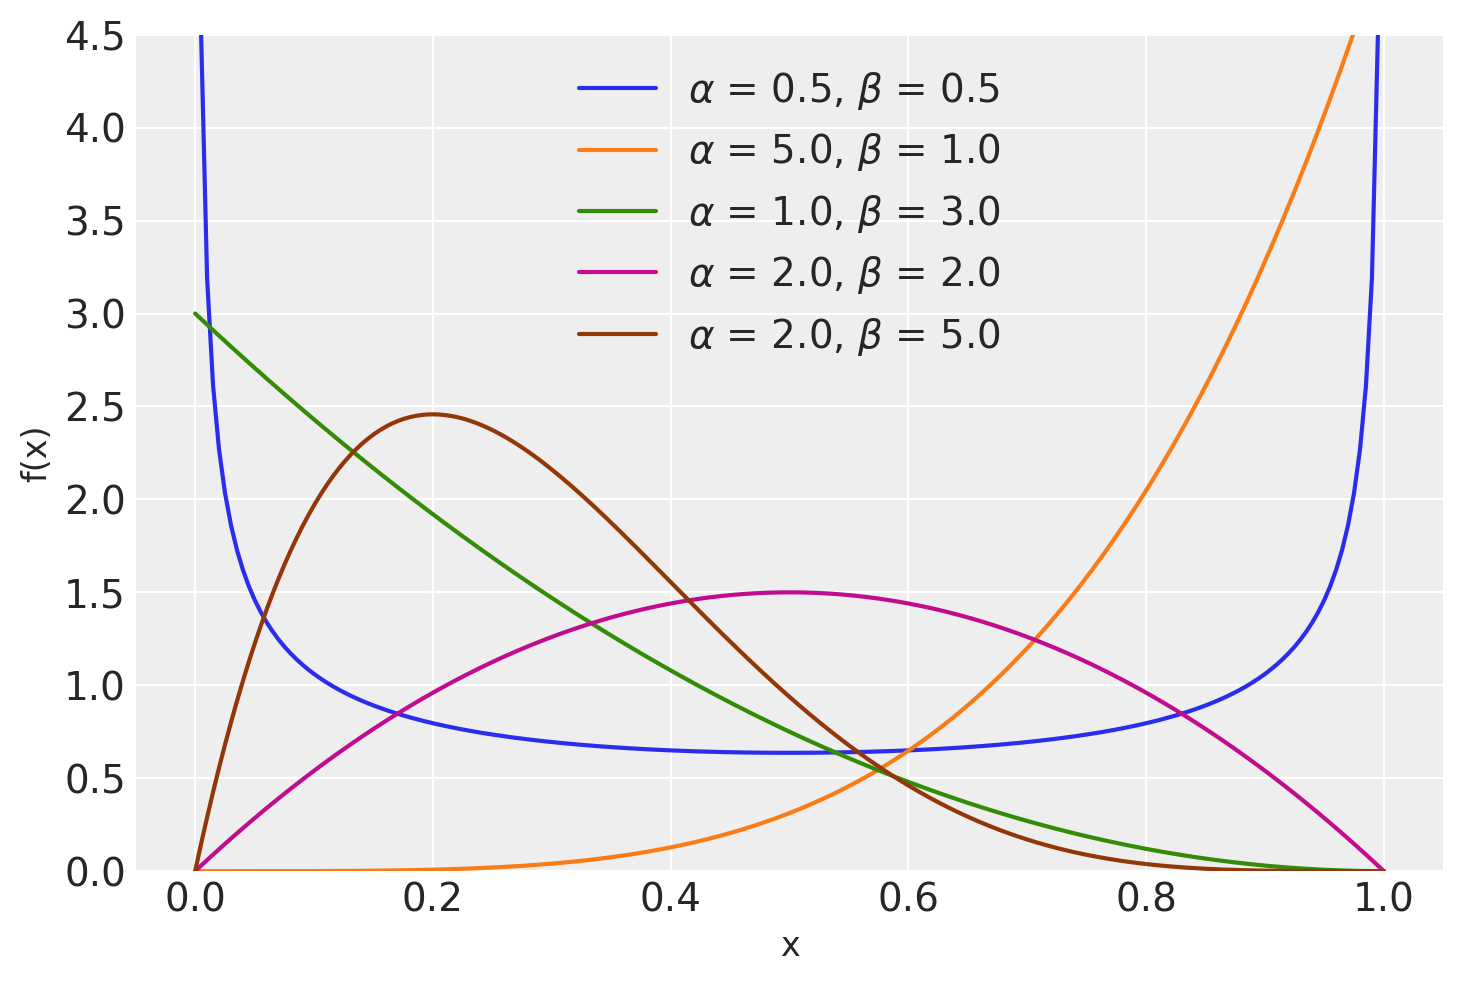

In [59]:
x = np.linspace(0, 1, 200)
alphas = [0.5, 5.0, 1.0, 2.0, 2.0]
betas = [0.5, 1.0, 3.0, 2.0, 5.0]

plt.figure()
for a, b in zip(alphas, betas):
    pdf = stats.beta.pdf(x, a, b)
    plt.plot(x, pdf, label=r"$\alpha$ = {}, $\beta$ = {}".format(a, b))
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.ylim(0, 4.5)
plt.legend(loc=9);

In [60]:
def integrand(p, a, b):
    return p ** (a - 1) * (1 - p) ** (b - 1)

a = 3
b = 9
result, error = quad(integrand, 0, 1, args=(a, b))
print(result)

0.00202020202020202


In [61]:
result = (math.gamma(a) * math.gamma(b)) / math.gamma(a + b)
print(result)

0.00202020202020202


In [62]:
sc.beta(a, b)

0.00202020202020202

In [63]:
def beta_mean_mode_variance(alpha, beta):
    mean = alpha / (alpha + beta)
    mode = (alpha - 1) / (alpha + beta - 2)
    variance = alpha * beta / ((alpha + beta) ** 2 * (alpha + beta + 1))
    return mean, mode, variance

In [64]:
alpha = 7
beta = 3
mean, mode, variance = beta_mean_mode_variance(alpha, beta)
print(f"Mean: {mean}, Mode: {mode}, Variance: {variance}")

Mean: 0.7, Mode: 0.75, Variance: 0.019090909090909092


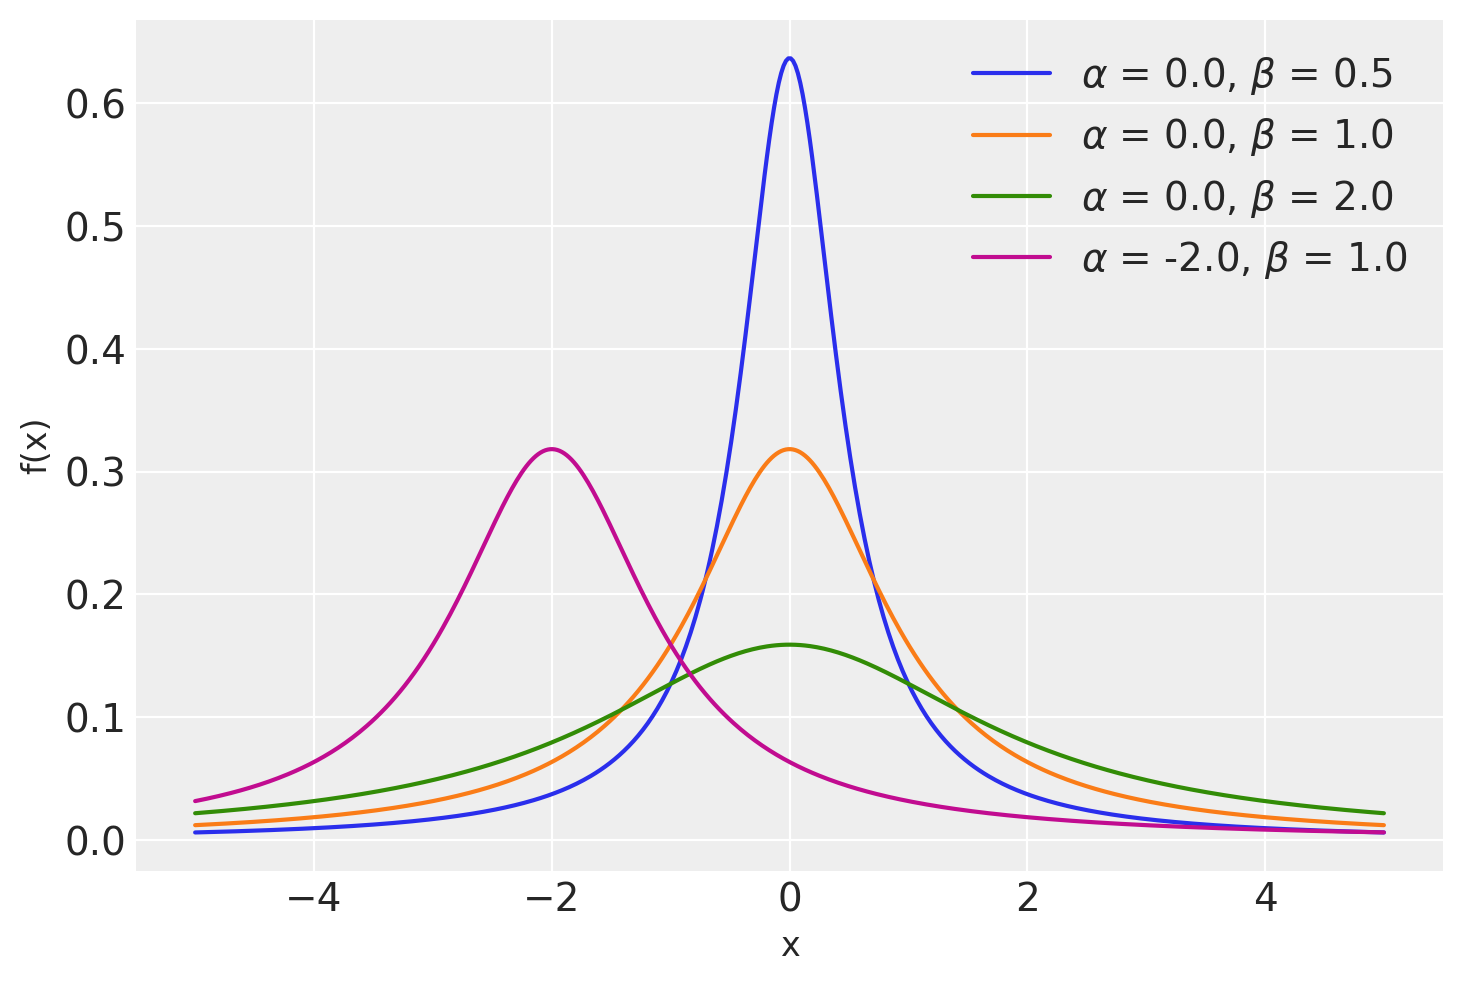

In [65]:
x = np.linspace(-5, 5, 500)
alphas = [0.0, 0.0, 0.0, -2.0]
betas = [0.5, 1.0, 2.0, 1.0]

plt.figure()
for a, b in zip(alphas, betas):
    pdf = stats.cauchy.pdf(x, loc=a, scale=b)
    plt.plot(x, pdf, label=r"$\alpha$ = {}, $\beta$ = {}".format(a, b))
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.legend(loc=1);

In [66]:
alpha = 3
beta = 5/3

mean = alpha / beta
print(mean)

1.7999999999999998


In [67]:
# Standard deviation = sqrt(alpha / beta^2)

sigma = np.sqrt(alpha / beta**2)
print(sigma)

1.0392304845413263


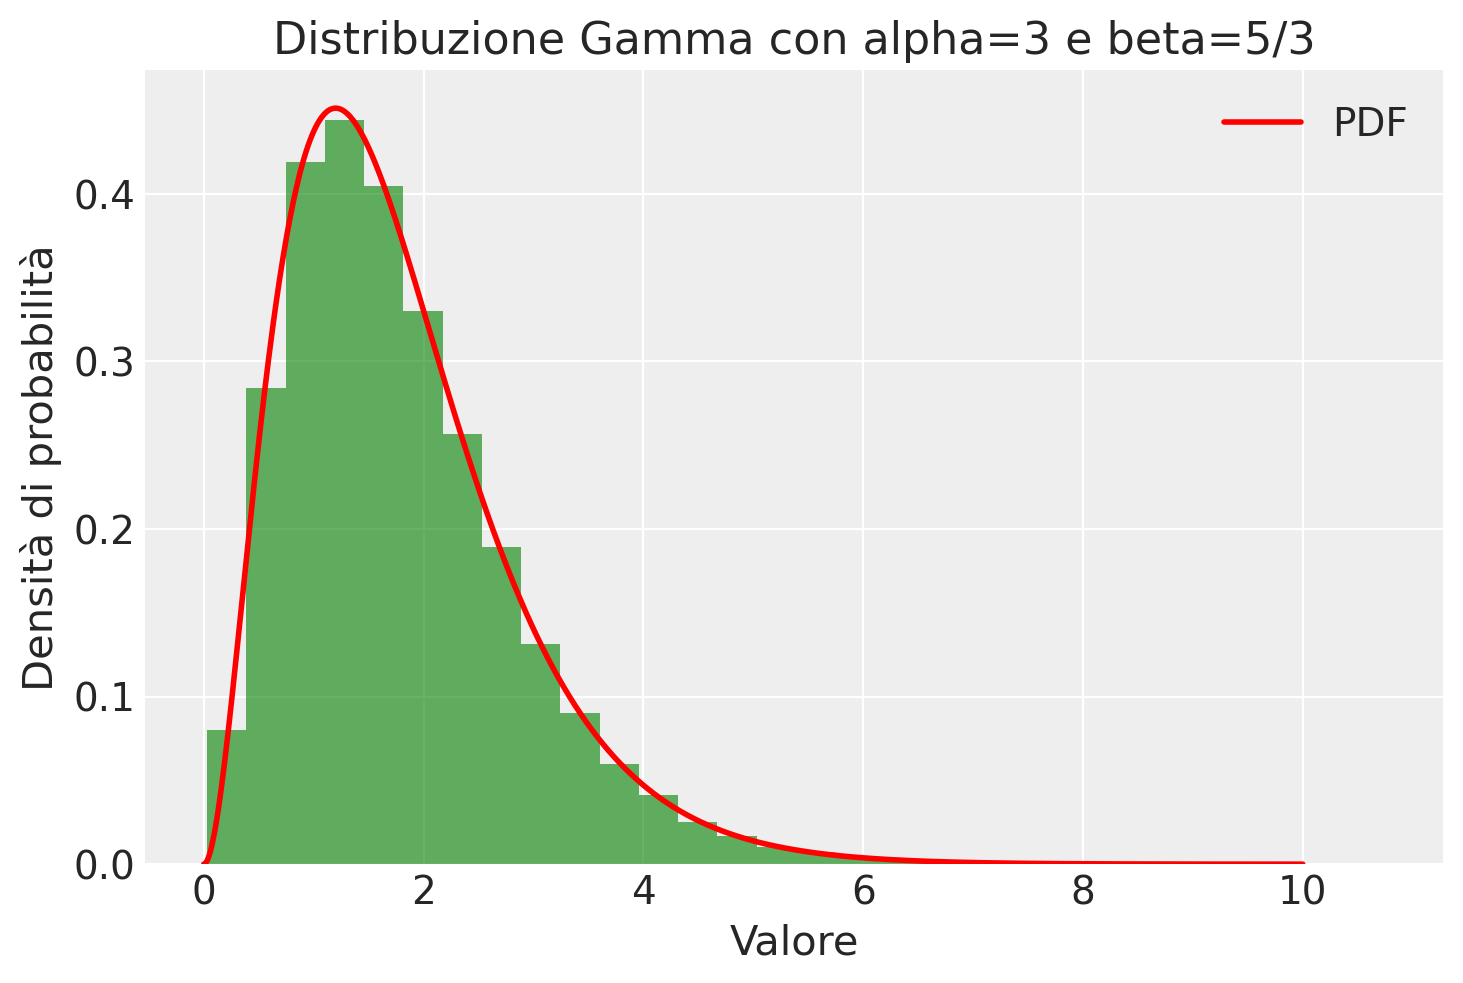

In [68]:
# Generazione di dati dalla distribuzione Gamma
data = rng.gamma(shape=alpha, scale=1/beta, size=100000)

# Plot dell'istogramma dei dati generati
plt.hist(data, bins=30, density=True, alpha=0.6, color='g')

# Plot della PDF (Probability Density Function) della distribuzione Gamma
x = np.linspace(0, 10, 1000)
plt.plot(x, stats.gamma.pdf(x, a=alpha, scale=1/beta), 'r-', lw=2, label='PDF')

plt.xlabel('Valore')
plt.ylabel('Densità di probabilità')
plt.title('Distribuzione Gamma con alpha=3 e beta=5/3')
plt.legend()
plt.show()

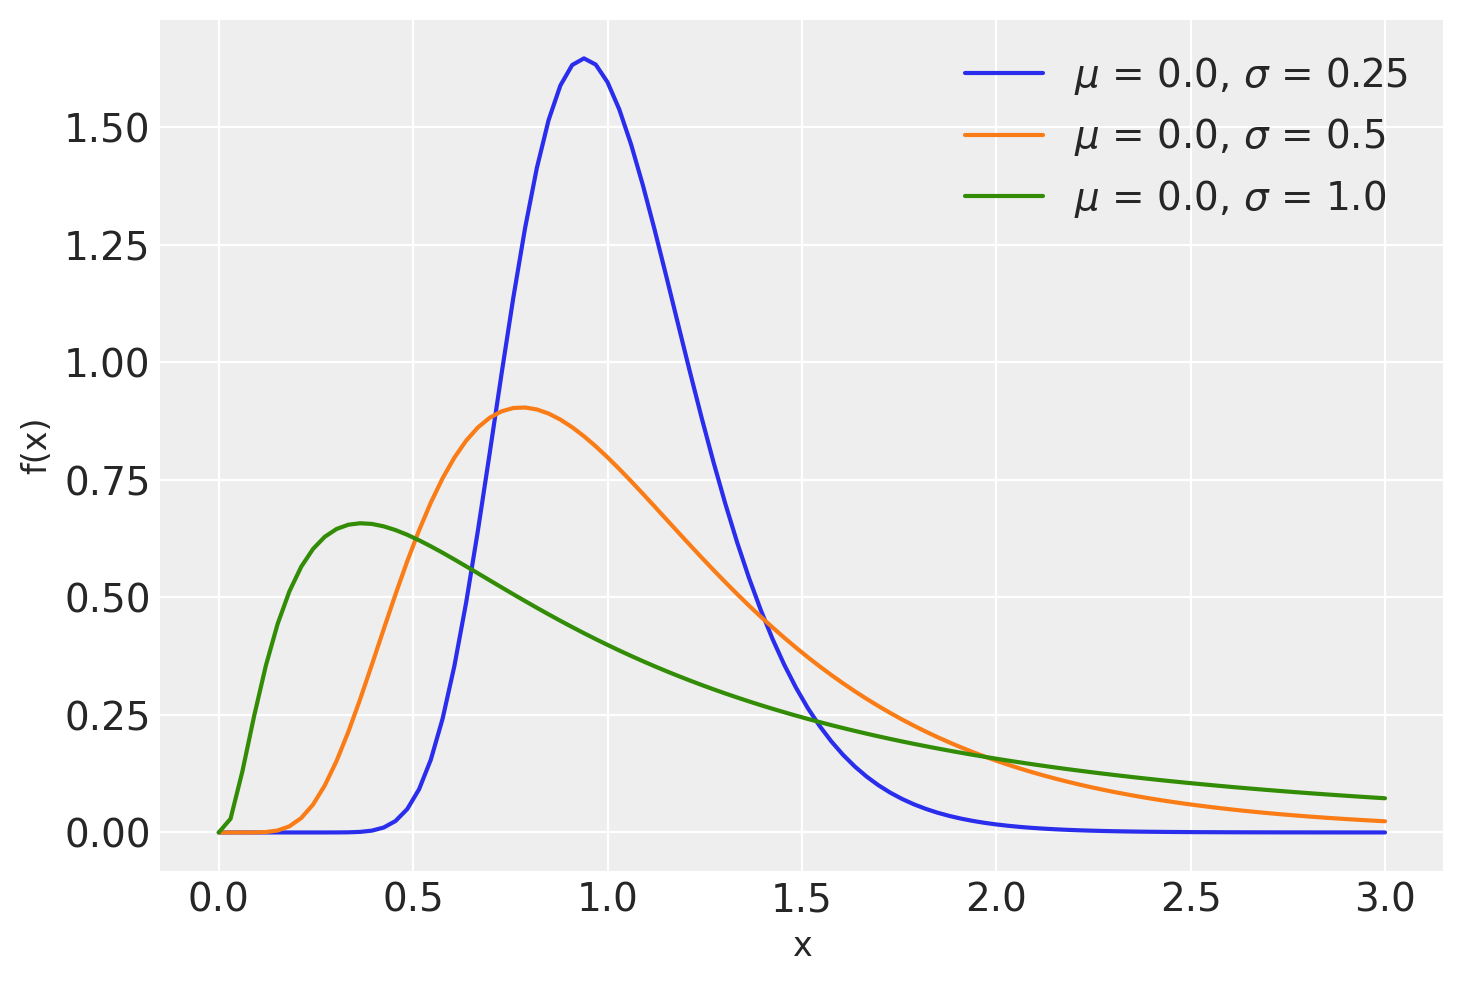

In [69]:
x = np.linspace(0, 3, 100)
mus = [0.0, 0.0, 0.0]
sigmas = [0.25, 0.5, 1.0]
plt.figure()
for mu, sigma in zip(mus, sigmas):
    pdf = stats.lognorm.pdf(x, sigma, scale=np.exp(mu))
    plt.plot(x, pdf, label=r"$\mu$ = {}, $\sigma$ = {}".format(mu, sigma))
plt.xlabel("x", fontsize=12)
plt.ylabel("f(x)", fontsize=12)
plt.legend(loc=1);

In [70]:
%load_ext watermark
%watermark -n -u -v -iv -w -m

Last updated: Sun Jun 16 2024

Python implementation: CPython
Python version       : 3.12.3
IPython version      : 8.25.0

Compiler    : Clang 16.0.6 
OS          : Darwin
Release     : 23.4.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

scipy     : 1.13.1
seaborn   : 0.13.2
numpy     : 1.26.4
arviz     : 0.18.0
pandas    : 2.2.2
matplotlib: 3.8.4

Watermark: 2.4.3

